Preamble

In [1]:
from scripts.open_preprocess_racmo import *
from scripts.paths import *

import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import numpy as np


import pandas as pd

Pathdata: /Volumes/imau01/rapid/RACMO2.3p2/FGRN055


In [2]:
time_resolution = 'Annual'
spatial_resolution = '1k'

years= ['1958', '2023']



# Runoff

In [7]:
masks1k = xr.open_dataset("/Users/annek/Documents/RACMO2.3p2/FGRN055/Downscaling_GR/masks1k.nc")


In [9]:

# dsRunoff = read_RACMO(spatial_resolution, time_resolution,years=years, variable="runoff")
# dsRunoff = dsRunoff.sel(time=slice(years[0], years[1]))

if spatial_resolution == '1k':
    # dsRunoff = dsRunoff.rename({'runoffcorr': 'runoff'})
    dsRunoffTundra_mmyear = read_RACMO('1k_reproject', time_resolution,years=years, variable="runoff")
    dsRunoffTundra_mmyear = dsRunoffTundra_mmyear.rename({'rlon': 'x', 'rlat': 'y'})
    dsRunoffTundra = volume(mask_data(dsRunoffTundra_mmyear['runoff'], "LSM Tundra",spatial_resolution), spatial_resolution)
else: 
    dsRunoffTundra = volume(mask_data(dsRunoff['runoff'], "LSM Tundra",spatial_resolution), spatial_resolution)
    dsRunoffIce = volume(mask_data(dsRunoff['runoff'], "PROMICE_Ice_Total",spatial_resolution),spatial_resolution)



Reading locally reprojected 1k data
Finished reading locally reprojected 1k data


## Runoff Ice on 500m

In [24]:
folder500m = "/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR_500m/"

# dsRunoff500mRACMO = xr.open_dataset(folder500m + "Annual/runoff.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.YY.nc", 'r')
# dsRunoff500mMAR   = xr.open_dataset(folder500m + "Annual/runoff.1940-2023.MAR3v14.GrIS.0.5km.YY.nc")

# SUM
if os.path.exists(folder500m + "Annual/sum/runoff_yearly_sum.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.YY.nc"):
    dsRunoff500mRACMO_sum = xr.open_dataset(folder500m + "Annual/sum/runoff_yearly_sum.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.YY.nc")
else:
    dsRunoff500mRACMO_sum = ds_500m.runoffcorr.sum(dim=['x', 'y'])/4
if os.path.exists(folder500m + "Annual/sum/runoff_yearly_sum.1940-2023.MAR3v14.GrIS.0.5km.YY.nc"):
    dsRunoff500mMAR_sum = xr.open_dataset(folder500m + "Annual/sum/runoff_yearly_sum.1940-2023.MAR3v14.GrIS.0.5km.YY.nc")
else:
    dsRunoff500mMAR_sum = ds500mMAR.runoffcorr.sum(dim=['x', 'y'])/4

dsRunoff500mRACMO_sum = dsRunoff500mRACMO_sum/1e6  #mm/km2 to km3
dsRunoff500mRACMO_sum.attrs['units'] = 'km3 w.e.'
dsRunoff500mMAR_sum = dsRunoff500mMAR_sum/1e6
dsRunoff500mMAR_sum.attrs['units'] = 'km3 w.e.'

# opening and saving mar

In [6]:
# dsRunoff500mRACMO = xr.open_dataset(folder500m + "Annual/runoff.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.YY.nc")
# mask_500m         = folder500m + "GrIS_topo_icemask_lsm_lon_lat_0.5km.nc"
# mask_500m = xr.open_dataset(mask_500m)

# dsRunoff500mRACMO_GIC = dsRunoff500mRACMO['runoffcorr'].where(((mask_500m['GIC']==1).values))
# dsRunoff500mRACMO_GrIS = dsRunoff500mRACMO['runoffcorr'].where(((mask_500m['GrIS']==1).values))
# dsRunoff500mRACMO_GIC_sum = dsRunoff500mRACMO_GIC.sum(dim=['x', 'y'])/4
# dsRunoff500mRACMO_GrIS_sum = dsRunoff500mRACMO_GrIS.sum(dim=['x', 'y'])/4

# dsRunoff500mRACMO_GIC.to_netcdf(path_sums_masks_500m + "runoff.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GIC.YY.nc")
# dsRunoff500mRACMO_GrIS.to_netcdf(path_sums_masks_500m + "runoff.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GrIS.YY.nc")
# dsRunoff500mRACMO_GIC_sum.to_netcdf(path_sums_masks_500m + "runoff_yearly_sum.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GIC.YY.nc")
# dsRunoff500mRACMO_GrIS_sum.to_netcdf(path_sums_masks_500m + "runoff_yearly_sum.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GrIS.YY.nc")

# # do the same but for mar
# print("MAR")
# dsRunoff500mMAR = xr.open_dataset(folder500m + "Annual/runoff.1940-2023.MAR3v14.GrIS.0.5km.YY.nc")
# mask_500m         = folder500m + "GrIS_topo_icemask_lsm_lon_lat_0.5km.nc"
# mask_500m = xr.open_dataset(mask_500m)

# print("Selecting GIC and GrIS")
# dsRunoff500mMAR_GIC = dsRunoff500mMAR['runoffcorr'].where(((mask_500m['GIC']==1).values))
# dsRunoff500mMAR_GrIS = dsRunoff500mMAR['runoffcorr'].where(((mask_500m['GrIS']==1).values))
# dsRunoff500mMAR_GIC_sum = dsRunoff500mMAR_GIC.sum(dim=['x', 'y'])/4
# dsRunoff500mMAR_GrIS_sum = dsRunoff500mMAR_GrIS.sum(dim=['x', 'y'])/4

# dsRunoff500mMAR_GIC_sum.to_netcdf(path_sums_masks_500m + "runoff_yearly_sum.1940-2023.MAR3v14.GrIS.0.5km.GIC.YY.nc")
# dsRunoff500mMAR_GrIS_sum.to_netcdf(path_sums_masks_500m + "runoff_yearly_sum.1940-2023.MAR3v14.GrIS.0.5km.GrIS.YY.nc")
# dsRunoff500mMAR_GIC.to_netcdf(path_sums_masks_500m + "runoff.1940-2023.MAR3v14.GrIS.0.5km.GIC.YY.nc")
# dsRunoff500mMAR_GrIS.to_netcdf(path_sums_masks_500m + "runoff.1940-2023.MAR3v14.GrIS.0.5km.GrIS.YY.nc")



Open RACMO ice per ice type

In [ ]:
path_sums_masks_500m  = "/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR_500m/Annual/Sums and masks/"

file_paths = {
    "dsRunoff500mRACMO_GIC": path_sums_masks_500m + "runoff.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GIC.YY.nc",
    "dsRunoff500mRACMO_GrIS": path_sums_masks_500m + "runoff.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GrIS.YY.nc",
    "dsRunoff500mRACMO_GIC_sum": path_sums_masks_500m + "runoff_yearly_sum.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GIC.YY.nc",
    "dsRunoff500mRACMO_GrIS_sum": path_sums_masks_500m + "runoff_yearly_sum.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GrIS.YY.nc"
}
datasets_RACMO_runoff_500m = {}

for name, file_path in file_paths.items():
    if os.path.exists(file_path):
        datasets_RACMO_runoff_500m[name] = xr.open_dataset(file_path)
        print(f"Opened {file_path}")

dsRunoff500mRACMO_GIC_sum = datasets_RACMO_runoff_500m["dsRunoff500mRACMO_GIC_sum"]/1e6
dsRunoff500mRACMO_GrIS_sum = datasets_RACMO_runoff_500m["dsRunoff500mRACMO_GrIS_sum"]/e6
dsRunoff500mRACMO_GIC = datasets_RACMO_runoff_500m["dsRunoff500mRACMO_GIC"]
dsRunoff500mRACMO_GrIS = datasets_RACMO_runoff_500m["dsRunoff500mRACMO_GrIS"]


fpaths_MAR = {
    "dsRunoff500mMAR_GIC": path_sums_masks_500m + "runoff.1940-2023.MAR3v14.GrIS.0.5km.GIC.YY.nc",
    "dsRunoff500mMAR_GrIS": path_sums_masks_500m + "runoff.1940-2023.MAR3v14.GrIS.0.5km.GrIS.YY.nc",
    "dsRunoff500mMAR_GIC_sum": path_sums_masks_500m + "runoff_yearly_sum.1940-2023.MAR3v14.GrIS.0.5km.GIC.YY.nc",
    "dsRunoff500mMAR_GrIS_sum": path_sums_masks_500m + "runoff_yearly_sum.1940-2023.MAR3v14.GrIS.0.5km.GrIS.YY.nc"
}

datasets_MAR_runoff_500m = {}

for name, file_path in fpaths_MAR.items():
    if os.path.exists(file_path):
        datasets_MAR_runoff_500m[name] = xr.open_dataset(file_path)
        print(f"Opened {file_path}")
dsRunoff500mMAR_GIC_sum = datasets_MAR_runoff_500m["dsRunoff500mMAR_GIC_sum"]/1e6
dsRunoff500mMAR_GrIS_sum = datasets_MAR_runoff_500m["dsRunoff500mMAR_GrIS_sum"]/1e6
dsRunoff500mMAR_GIC = datasets_MAR_runoff_500m["dsRunoff500mMAR_GIC"]
dsRunoff500mMAR_GrIS = datasets_MAR_runoff_500m["dsRunoff500mMAR_GrIS"]

for  dataset in [dsRunoff500mRACMO_GIC_sum, dsRunoff500mRACMO_GrIS_sum, dsRunoff500mMAR_GIC_sum, dsRunoff500mMAR_GrIS_sum]:
    dataset.attrs['units'] = 'km3 w.e.'
    dataset.values = dataset.values/1e6

# Solid Discharge

<Axes: xlabel='Date'>

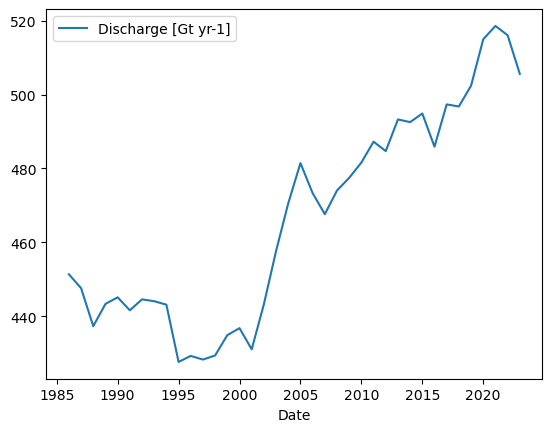

In [10]:
dfGISDMankoff = pd.read_csv(path_Mankoff2020Solid + "GIS_D.csv", index_col=0, parse_dates=True)
dfErrorGISDMankoff = pd.read_csv(path_Mankoff2020Solid + "GIS_err.csv", index_col=0, parse_dates=True)
dfGIScoverageMankoff = pd.read_csv(path_Mankoff2020Solid + "GIS_coverage.csv", index_col=0, parse_dates=True)
filterCov =  (dfGIScoverageMankoff < 0.5).values

if (time_resolution == 'Monthly'):
    dfGISDMankoff = dfGISDMankoff/12
    dfErrorGISDMankoff = dfErrorGISDMankoff/12
elif (time_resolution == 'Annual'):
    dfGISDMankoff = dfGISDMankoff.groupby(dfGISDMankoff.index.year).mean()
    dfErrorGISDMankoff = dfErrorGISDMankoff.groupby(dfErrorGISDMankoff.index.year).mean()

dfGISDMankoff.plot()



# Precipitation

In [11]:
precipitation_annual = "/Volumes/imau01/rapid/RACMO2.3p2/FGRN055/Downscaling_GR/Annual/precip.1958-2023.BN_RACMO2.3p2_ERA5_3h_FGRN055.1km.YY.nc.gz"
ds_precip = xr.open_dataset(precipitation_annual, decode_times=False)
decadal_year = ds_precip['time'].values
ds_precip['time'] = pd.to_datetime(1958+decadal_year, format='%Y') +pd.to_timedelta(decadal_year%1*365, unit='d')


masks1k = open_mask_1k()
masks1k['x'] = ds_precip['x']
masks1k['y'] = ds_precip['y']
dsPrecipFjords = ds_precip["precipcorr"].where(masks1k["fjords"], np.nan)
dsPrecipFjordsVol = volume(dsPrecipFjords, "1k").sum(dim=["x", "y"])


In [17]:
# dsPrecipFjords.to_netcdf(pathDataTemp + "RACMO2.3p2_1km_precip_fjords_Annual.nc")


In [5]:
# can you ask me if i'm sure i want to run this cell 

# check if file exists : pathDataTemp + "RACMO2.3p2_1km_total_precip_fjords.nc"

if (os.path.isfile(pathDataTemp + "RACMO2.3p2_1km_total_precip_fjords.nc")):
    dsPrecipFjordsVol = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1km_total_precip_fjords.nc")
    dsPrecipFjordsVol = dsPrecipFjordsVol['precipcorr'] 
else:
    dsPrecipMonth = read_RACMO("1k",time_resolution, years, variable="precip")
    masks1k = open_mask_1k()
    masks1k['x'] = dsPrecipMonth['x']
    masks1k['y'] = dsPrecipMonth['y']
    dsPrecipFjords = dsPrecipMonth["precipcorr"].where(masks1k["fjords"], np.nan)
    dsPrecipFjords.to_netcdf(pathDataTemp + "RACMO2.3p2_1km_precip_fjords.nc")
    
    dsPrecipFjordsVol = volume(dsPrecipFjords, "1k").sum(dim=["x", "y"])


if time_resolution == 'Annual':
    

    dsPrecipFjordsVolAnn = dsPrecipFjordsVol.groupby(dsPrecipFjordsVol.time.dt.year).mean()
    dsPrecipFjordsVolAnn = dsPrecipFjordsVolAnn.rename({'year':'time'})
    dsPrecipFjordsVolAnn['time'] = pd.to_datetime(dsPrecipFjordsVolAnn.time.values, format='%Y')

dsPrecipFjordsVol

KeyboardInterrupt: 

# Greenland - combined

NameError: name 'dsRunoffIce' is not defined

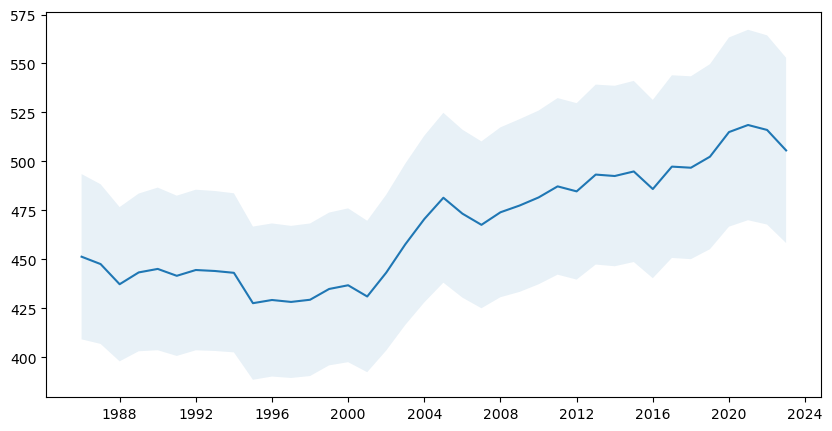

In [30]:
# now make a plot with the runoff and the precipitation and the Mankoff data


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.fill_between(pd.to_datetime(dfGISDMankoff.index, format='%Y'), (dfGISDMankoff - dfErrorGISDMankoff.values).squeeze().to_numpy(),(dfGISDMankoff + dfErrorGISDMankoff.values).squeeze().to_numpy(), alpha=0.1)
ax.plot(pd.to_datetime(dfGISDMankoff.index, format='%Y'), dfGISDMankoff, label='Solid Ice discharge (Mankoff2020)')
ax.plot(dsRunoffIce.time, dsRunoffIce.sum(dim=['x', 'y']), label="Runoff Ice (RACMO)")
ax.plot(dsRunoffTundra.time, dsRunoffTundra.sum(dim=['rlon', 'rlat']), label="Runoff Tundra (RACMO)")
if time_resolution == 'Annual':
    ax.plot(dsPrecipFjordsVolAnn.time, dsPrecipFjordsVolAnn, label="Precipitation Fjords (RACMO)")
else:
    ax.plot(dsPrecipFjordsVol.time, dsPrecipFjordsVol, label="Precipitation Fjords (RACMO)")

#xlim = ax.get_xlim()
ax.set_xlim([pd.Timestamp(years[0]+"-01-01"), pd.Timestamp(years[-1]+"-12-31")])
ax.set_ylabel("Mass loss (Gt)")
ax.legend()
fig.suptitle(f"{time_resolution} {spatial_resolution} RACMO2.3p2")
plt.show()

## Annual timeseries 

In [18]:
dsRunoff500mMAR_GIC_sum/1e6

<xarray.DataArray 'runoffcorr' (time: 84)>
array([117.58294 , 134.10107 , 124.59035 ,  95.61762 , 115.32582 ,
       102.09151 , 105.857   , 120.33682 , 126.66258 , 126.79465 ,
       141.17026 , 131.67807 , 138.27173 , 124.58711 , 104.7552  ,
        89.69292 , 116.78204 , 141.83936 , 120.48648 , 107.098946,
       144.6212  , 113.50475 , 115.05296 ,  84.14143 ,  75.41151 ,
        91.25182 , 122.46782 ,  90.86137 , 124.679726, 111.67494 ,
        82.82132 , 107.561   ,  63.489674,  86.11842 ,  99.04447 ,
       107.871155,  91.67747 ,  98.172005, 109.08509 ,  89.73672 ,
       109.0337  , 111.13811 ,  87.70782 ,  74.164665, 115.79037 ,
       115.24296 ,  89.215034, 118.98951 , 118.79789 , 116.99203 ,
       136.27405 , 118.24172 ,  64.74787 , 123.569405,  97.3385  ,
       123.61704 , 100.14154 , 114.76708 , 143.74054 , 100.96335 ,
       115.79106 , 116.48336 , 144.08504 , 175.65271 , 135.7269  ,
       153.66017 , 118.21103 , 139.33315 , 159.85164 , 123.10345 ,
       182.93115 , 146.0934  , 196.75043 , 109.36794 , 146.91785 ,
       132.67093 , 169.60188 , 139.42795 , 110.42888 , 201.1905  ,
       168.67397 , 172.4589  , 145.46094 , 177.60909 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1940-06-30T18:00:00 ... 2023-06-30T18:00:00

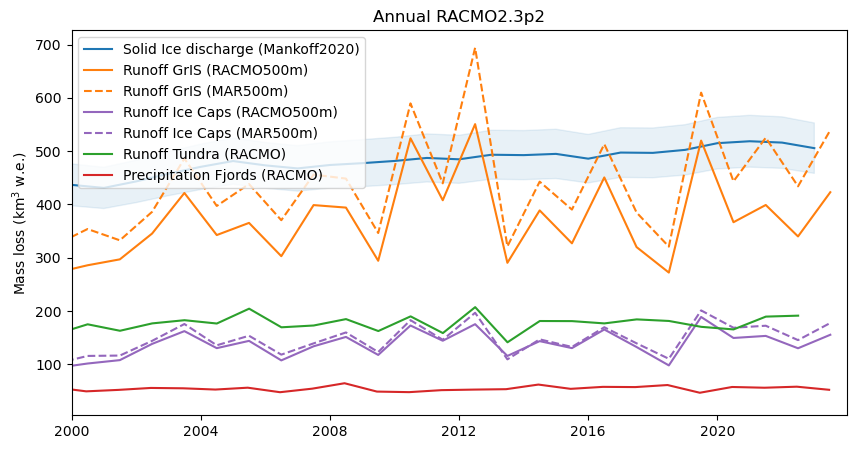

In [25]:
# now make a plot with the runoff and the precipitation and the Mankoff data


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
FW_type = ["Solid", "IceRun", "Tundra", "Precip", "IceCap"]
dictFWcolor = dict(zip(FW_type, colors))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.fill_between(pd.to_datetime(dfGISDMankoff.index, format='%Y'), (dfGISDMankoff - dfErrorGISDMankoff.values).squeeze().to_numpy(),(dfGISDMankoff + dfErrorGISDMankoff.values).squeeze().to_numpy(), alpha=0.1, color = dictFWcolor['Solid'])
ax.plot(pd.to_datetime(dfGISDMankoff.index, format='%Y'), dfGISDMankoff, label='Solid Ice discharge (Mankoff2020)', color = dictFWcolor['Solid'])
ax.plot(dsRunoff500mRACMO_GrIS_sum.time, dsRunoff500mRACMO_GrIS_sum, label="Runoff GrIS (RACMO500m)", color=dictFWcolor['IceRun'])
ax.plot(dsRunoff500mMAR_GrIS_sum.time, dsRunoff500mMAR_GrIS_sum, label="Runoff GrIS (MAR500m)", color=dictFWcolor['IceRun'], linestyle ="--")
ax.plot(dsRunoff500mRACMO_GIC_sum.time, dsRunoff500mRACMO_GIC_sum, label="Runoff Ice Caps (RACMO500m)", color=dictFWcolor['IceCap'])
ax.plot(dsRunoff500mMAR_GIC_sum.time, dsRunoff500mMAR_GIC_sum, label="Runoff Ice Caps (MAR500m)", color=dictFWcolor['IceCap'], linestyle ="--")
ax.plot(dsRunoffTundra.time, dsRunoffTundra.sum(dim=['x', 'y']), label="Runoff Tundra (RACMO)", color=dictFWcolor['Tundra'])
ax.plot(dsPrecipFjordsVol.time, dsPrecipFjordsVol, label="Precipitation Fjords (RACMO)", color=dictFWcolor['Precip'])

# set xlim for first 1939 to 2024
years_xlim = [2000, 2023]
ax.set_xlim([pd.Timestamp(str(years_xlim[0])+"-01-01"), pd.Timestamp(str(years_xlim[1])+"-12-31")])


ax.set_ylabel(r"Mass loss (km$^3$ w.e.)")
ax.legend()
ax.set_title(f"{time_resolution} RACMO2.3p2")
# save as png
pathFigures = pathGithubFolder+ "results/figures/"

plt.savefig(pathFigures + f"Annual timeseries/RACMO2.3p2_Annual_{years_xlim[0]}-{years_xlim[1]}.png", dpi=300, bbox_inches='tight')

plt.show()

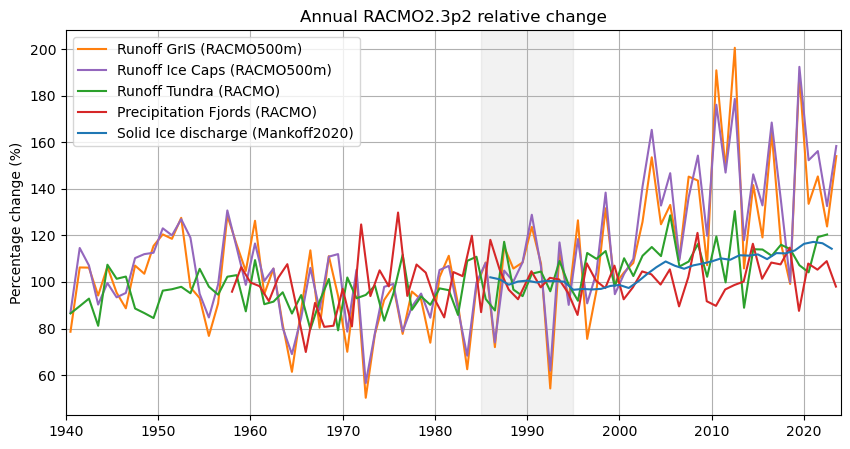

In [31]:
# Calculate the 10-year average
avg_10yr_RACMO = dsRunoff500mRACMO_GrIS_sum.sel(time=slice('1985', '1994')).mean(dim='time')
avg_10yr_RACMO_GIC = dsRunoff500mRACMO_GIC_sum.sel(time=slice('1985', '1994')).mean(dim='time')
avg_10yr_Tundra = dsRunoffTundra.sum(dim=['x', 'y']).sel(time=slice('1985', '1994')).mean(dim='time')
avg_10yr_Precip = dsPrecipFjordsVol.sel(time=slice('1985', '1994')).mean(dim='time')
avg_10yr_Solid = dfGISDMankoff.loc[1985:1995].mean()

# Calculate the percentage change
pct_change_RACMO = (dsRunoff500mRACMO_GrIS_sum ) / avg_10yr_RACMO * 100
pct_change_RACMO_GIC = (dsRunoff500mRACMO_GIC_sum ) / avg_10yr_RACMO_GIC * 100
pct_change_Tundra = (dsRunoffTundra.sum(dim=['x', 'y']) ) / avg_10yr_Tundra * 100
pct_change_Precip = (dsPrecipFjordsVol ) / avg_10yr_Precip * 100
pct_change_Solid = (dfGISDMankoff ) / avg_10yr_Solid * 100

# Plot the percentage change
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(pct_change_RACMO.time, pct_change_RACMO, label="Runoff GrIS (RACMO500m)", color=dictFWcolor['IceRun'])
ax.plot(pct_change_RACMO_GIC.time, pct_change_RACMO_GIC, label="Runoff Ice Caps (RACMO500m)", color=dictFWcolor['IceCap'])
ax.plot(pct_change_Tundra.time, pct_change_Tundra, label="Runoff Tundra (RACMO)", color=dictFWcolor['Tundra'])
ax.plot(pct_change_Precip.time, pct_change_Precip, label="Precipitation Fjords (RACMO)", color=dictFWcolor['Precip'])
ax.plot(pd.to_datetime(dfGISDMankoff.index, format='%Y'),  pct_change_Solid, label='Solid Ice discharge (Mankoff2020)', color = dictFWcolor['Solid'])

# shade area between 1985 and 1995
ax.axvspan(pd.Timestamp('1985-01-01'), pd.Timestamp('1994-12-31'), color='gray', alpha=0.1)


years_xlim = [1940, 2023]
ax.set_xlim([pd.Timestamp(str(years_xlim[0])+"-01-01"), pd.Timestamp(str(years_xlim[1])+"-12-31")])
ax.set_ylabel("Percentage change (%)")
ax.legend()
ax.set_title(f"{time_resolution} RACMO2.3p2 relative change")

ax.grid()
plt.show()

Combine data

In [54]:
dfRunoffTundra = dsRunoffTundra.sum(dim=['x', 'y']).squeeze().to_dataframe(name='Runoff Tundra').drop(columns='height')
# dfRunoffIce = dsRunoffIce.sum(dim=['rlon', 'rlat']).squeeze().to_dataframe(name='Runoff Ice').drop(columns='height')
dfRunoffRACMOGrIS = dsRunoff500mRACMO_GrIS_sum.squeeze().to_dataframe(name='Runoff GrIS')
dfRunoffRACMOGIC = dsRunoff500mRACMO_GIC_sum.squeeze().to_dataframe(name='Runoff Ice Caps')
dfPrecipFjordsVol = dsPrecipFjordsVol.to_dataframe(name='Precipitation Fjords')
dfSolidMankoff = dfGISDMankoff.copy(deep=True)

if time_resolution == 'Annual':
    for df in [dfRunoffTundra, dfRunoffRACMOGrIS, dfRunoffRACMOGIC]:  df.index = df.index.year
    dfPrecipFjordsVol = dfPrecipFjordsVol.groupby(dfPrecipFjordsVol.index.year).mean()

elif time_resolution == 'Monthly':
   for df in [dfRunoffTundra, dfRunoffIce, dfPrecipFjordsVol,]:  df.index = df.index.strftime('%Y-%m')
   dfSolidMankoff.index = pd.to_datetime(dfSolidMankoff.index)
   dfSolidMankoff = dfSolidMankoff.groupby(dfSolidMankoff.index.strftime('%Y-%m')).mean()
#    dfPrecipFjordsVol = dfPrecipFjordsVol.groupby(dfPrecipFjordsVol.index.strftime('%Y-%m')).mean()

df_sum_GIS_55 = pd.concat([dfSolidMankoff, dfRunoffRACMOGrIS,dfRunoffRACMOGIC, dfRunoffTundra,  dfPrecipFjordsVol, ], axis=1).sort_index()

if time_resolution == 'Monthly':
    df_sum_GIS_55.index = pd.to_datetime(df_sum_GIS_55.index, format='%Y-%m')
else:
    df_sum_GIS_55.index = pd.to_datetime(df_sum_GIS_55.index, format='%Y')

In [62]:
filterNanMonths = df_sum_GIS_55.isna().sum(axis=1)>0  # find months with NaN values in any of the variables
df_sum_GIS_55Relative = ((df_sum_GIS_55.mask(filterNanMonths).T/df_sum_GIS_55.sum(axis=1)).T)

In [113]:
df_sum_GIS_55['2018':'2023']
df_sum_GIS_55['2018':'2023'].sum(axis=1)


2018-01-01    1109.545801
2019-01-01    1428.120099
2020-01-01    1254.163019
2021-01-01    1316.619527
2022-01-01    1235.638438
2023-01-01    1136.291957
dtype: float64

In [63]:
df_sum_GIS_55.columns

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
FW_type_long = ['Discharge [Gt yr-1]', 'Runoff GrIS', 'Runoff Tundra',
       'Precipitation Fjords', 'Runoff Ice Caps']
dictFWcolor_long = dict(zip(FW_type_long, colors))


In [1]:
list(range(1990,2024+1))

[2024,
 2023,
 2022,
 2021,
 2020,
 2019,
 2018,
 2017,
 2016,
 2015,
 2014,
 2013,
 2012,
 2011,
 2010,
 2009,
 2008,
 2007,
 2006,
 2005,
 2004,
 2003,
 2002,
 2001,
 2000,
 1999,
 1998,
 1997,
 1996,
 1995,
 1994,
 1993,
 1992,
 1991,
 1990]

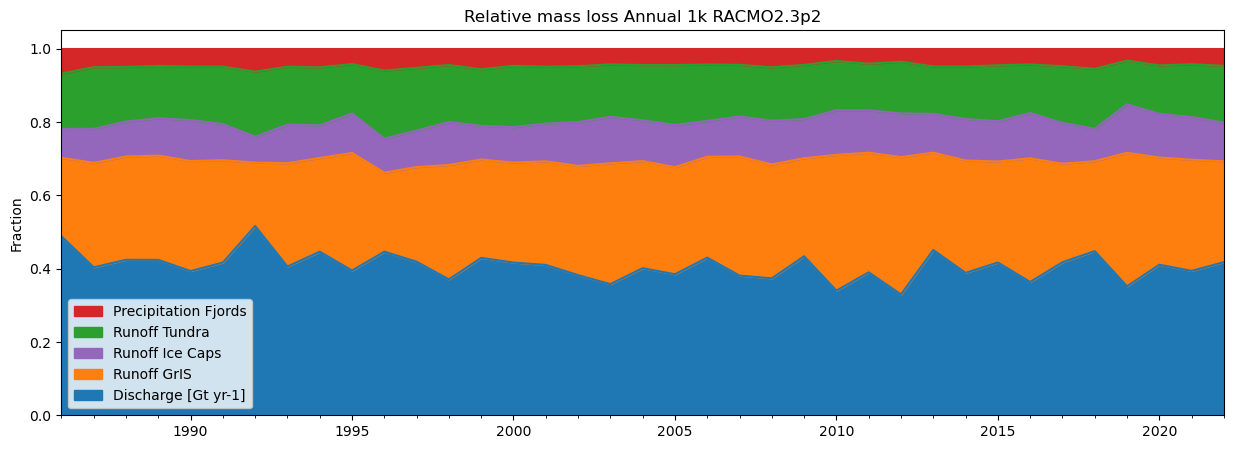

p-value for Discharge [Gt yr-1] trend: 0.032842282207943635
p-value for Runoff GrIS trend: 0.02005443455395956
p-value for Runoff Ice Caps trend: 0.00027825530204336323
p-value for Runoff Tundra trend: 0.005264164100593359
p-value for Precipitation Fjords trend: 0.0014993926104580927


In [101]:
import matplotlib.dates as mdates
from scipy import stats

fig,ax = plt.subplots( figsize=(15, 5))
# df_sum_GIS_55.plot(kind='line', subplots=True, figsize=(10, 6))
# set colors according to dictFWcolor

df_sum_GIS_55Relative['1986':'2022'].plot(kind='area',stacked=True, ax=ax,color=[dictFWcolor_long[FW] for FW in df_sum_GIS_55Relative.columns])

# df_sum_GIS_55Relative.plot(kind='bar', ax=ax, stacked=True)
# max 10 ticklabels

# update figsize
# plt.subplots( figsize=(15, 5))
# plt.xticks(rotation=45)
plt.title(f"Relative mass loss {time_resolution} {spatial_resolution} RACMO2.3p2")
plt.ylabel("Fraction")
# do legend inverse
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))

plt.show()

import numpy as np
import plotly.graph_objects as go

fig = go.Figure()

# Add linear trend
for col in df_sum_GIS_55Relative.columns:
    x = df_sum_GIS_55Relative.index.year
    y = df_sum_GIS_55Relative[col].values*100

    x= x[~np.isnan(y)]
    y= y[~np.isnan(y)]

    # Add the original data
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=col, line=dict(color=dictFWcolor_long[col])))
    
    # Calculate the linear trend
    trend = np.polyfit(x, y, 1)
    trendline = np.poly1d(trend)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print(f'p-value for {col} trend: {p_value}')
    
    # Add the trendline
    fig.add_trace(go.Scatter(x=x, y=trendline(x), mode='lines', name=f'Trend, {slope*10:.1f}%/decade \np={p_value:.3f}', line=dict(color=dictFWcolor_long[col], dash='dash')))

# update lyaout to plotly white
fig.update_layout(template='plotly_white', title=f"Relative mass loss {time_resolution} RACMO2.3p2", width = 1000, height = 500)
fig.show()

array([-3.26265661e-04,  7.01472361e-01])

Index([1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022],
      dtype='int32')

# Per sector

In [6]:
# cmc.roma.colors
# get 8 colors from the roma colormap
colors = cmc.roma.colors
colors = [colors[i] for i in range(0, len(colors), len(colors)//8)]
colors_hex_Moug = [mcolors.rgb2hex(color) for color in colors]
dict_Moug_colors = dict(zip(np.arange(8), colors))


(14610.0, 14974.0)

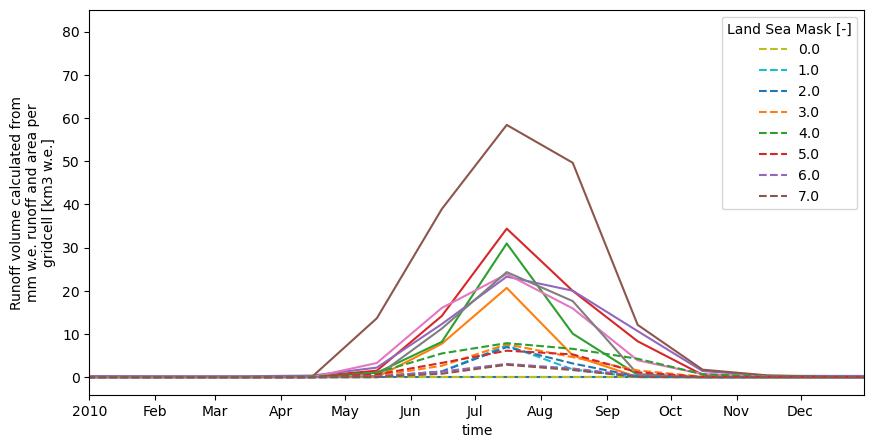

In [7]:

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

written_file = "/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/Monthly/runoff_monthly_FGRN055_Downscaled_RACMO2.3p2_RACMO2.3p2_1k_runoff_Monthly_sector_1990_2022_GrIS_Ice.nc"

xr.open_dataset(written_file)['runoff'].plot(x='time', hue='Mouginot_basins', ax=ax)
ice_caps = xr.open_dataset("/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/Monthly/runoff_monthly_FGRN055_Downscaled_RACMO2.3p2_RACMO2.3p2_1k_runoff_Monthly_sector_1990_2022_Ice_Caps.nc")
ice_caps['runoff'].plot(x='time', ax=ax, hue = 'Mouginot_basins', linestyle='--')

plt.xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2010-12-31'))

In [8]:
def mask_MougBasins_ice(ds, IceOrTundra):
    '''Mask the RACMO data with the Mouginot basins and sum the values for each basin
    IceOrTundra: "Ice" or "Tundra" to select the mask to use'''
    if spatial_resolution == '5_5k':

        mask55 = open_mask_5_5k(spatial_resolution)
        mask55['rlat'] = ds['rlat']
        mask55['rlon'] = ds['rlon']

        if IceOrTundra == 'Ice':
            ds['Mouginot_basins'] = mask55['Mouginot_basins']
            dsMougTime = ds.groupby('Mouginot_basins').sum().isel(height=0)
        elif IceOrTundra == 'Tundra':
            ds['Mouginot_basins'] = mask55['Mouginot_Tundra']
            dsMougTime = ds.groupby('Mouginot_basins').sum().isel(height=0)
        ds.attrs['Description'] = f"Sum per sector of the Mouginot basins for {spatial_resolution} RACMO2.3p2, for the {IceOrTundra} "
        return dsMougTime
        
    elif spatial_resolution == '1k':
        if not 'masks1k' in globals():
            mask1k = open_mask_1k()
        path_mask_1k_with_tundra = "/Users/annek/Documents/RACMO2.3p2/FGRN055/Downscaling_GR/GrIS_topo_icemask_lsm_tundra_basins_lon_lat_1km.nc"
        mask_1k_with_tundra = xr.open_dataset(path_mask_1k_with_tundra)
        if IceOrTundra == 'Ice':
            ds['Mouginot_basins'] = mask_1k_with_tundra['Basins_All_Greenland']
            dsMougTime = ds.groupby('Mouginot_basins').sum()
        elif IceOrTundra == 'Tundra':
            ds['Mouginot_basins'] = mask_1k_with_tundra['Tundra_basins']
            dsMougTime = ds.groupby('Mouginot_basins').sum()
        # give a attribute
        ds.attrs['Description'] = f"Sum per sector of the Mouginot basins for {spatial_resolution} RACMO2.3p2, for the {IceOrTundra} "
        return dsMougTime


dict_Moug = {0:"Not GRIS", 1: "NO", 2: "NE", 3: "CE", 4: "SE", 5: "SW", 6: "CW", 7: "NW"}

Runoff ice sheet

<Axes: title={'center': 'Liquid Runoff Ice Sheet per sector 2010-2012'}, xlabel='time'>

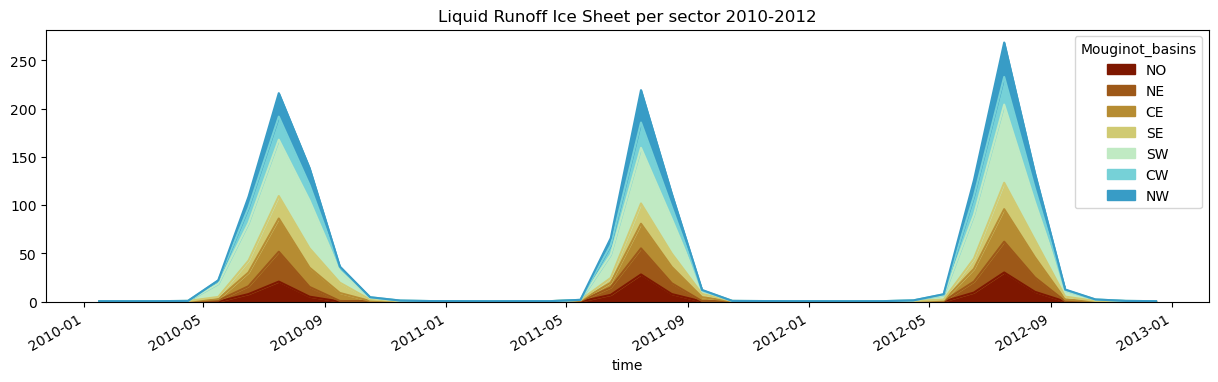

In [9]:
dsRunoffIceSector = pathAnnekeFolderIMAU02+ "/Downscaling_GR/Monthly/runoff_monthly_FGRN055_Downscaled_RACMO2.3p2_RACMO2.3p2_1k_runoff_Monthly_sector_1990_2022_GrIS_Ice.nc"
dsRunoffIceSector = xr.open_dataset(dsRunoffIceSector)['runoff']
dfRunoffIceSector = dsRunoffIceSector.to_dataframe(name='Liquid Runoff Ice Sheet').reset_index().set_index('time').pivot(columns='Mouginot_basins').rename(columns=dict_Moug)

dfRunoffIceSector.columns = dfRunoffIceSector.columns.get_level_values(1)
#  checkl if 
assert dfRunoffIceSector["Not GRIS"].sum() == 0
dfRunoffIceSector = dfRunoffIceSector.drop(columns="Not GRIS")

dfRunoffIceSector['2010':'2012'].plot(kind='area',stacked=True, color=colors_hex_Moug, figsize=(15, 4), title="Liquid Runoff Ice Sheet per sector 2010-2012")

Runoff ice cap

<Axes: title={'center': 'Liquid Runoff Ice Caps'}, xlabel='time'>

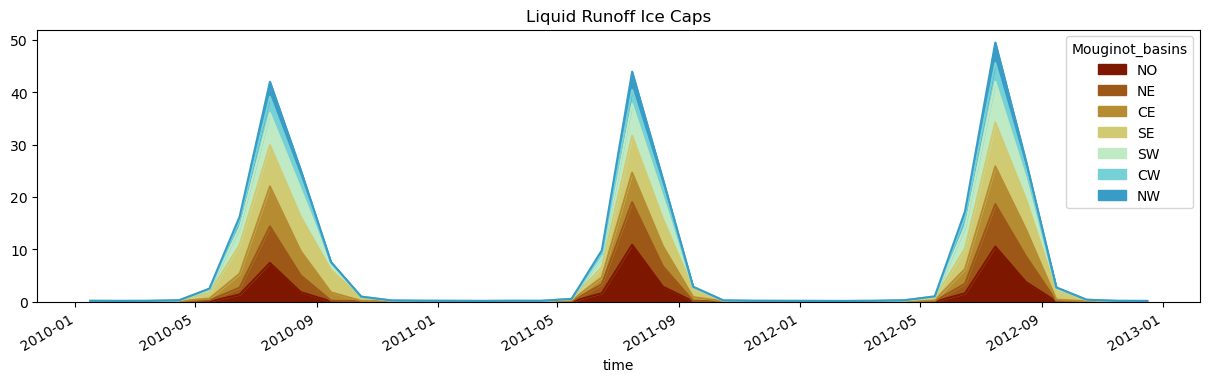

In [10]:
dsRunoffIceCapSector = xr.open_dataset( pathAnnekeFolderIMAU02+ "/Downscaling_GR/Monthly/runoff_monthly_FGRN055_Downscaled_RACMO2.3p2_RACMO2.3p2_1k_runoff_Monthly_sector_1990_2022_Ice_Caps.nc")['runoff']
dfRunoffIceCapSector = dsRunoffIceCapSector.to_dataframe(name='Liquid Runoff Ice Caps').reset_index().set_index('time').pivot(columns='Mouginot_basins').rename(columns=dict_Moug)

dfRunoffIceCapSector.columns = dfRunoffIceCapSector.columns.get_level_values(1)
#  checkl if sum not GRIS is 0
assert dfRunoffIceCapSector["Not GRIS"].sum() == 0
dfRunoffIceCapSector = dfRunoffIceCapSector.drop(columns="Not GRIS")
dfRunoffIceCapSector['2010':'2012'].plot(kind='area',stacked=True, color=colors_hex_Moug, figsize=(15, 4), title = "Liquid Runoff Ice Caps")

Runoff Tundra

In [11]:
mask_tundra_sector_1k = "/Users/annek/Documents/RACMO2.3p2/FGRN055/Downscaling_GR/GrIS_topo_icemask_lsm_tundra_basins_ocean_lon_lat_1km.nc"
mask_tundra_sector_1k = xr.open_dataset(mask_tundra_sector_1k)
dsRunoffTundra_mmyear = read_RACMO('1k_reproject', time_resolution,years=years, variable="runoff")
# rename x to rlon and y to rlat
# dsRunoffTundra_mmyear['Tundra_basins'] = mask_tundra_sector_1k['Tundra_basins']
mask_tundra_sector_1k['Tundra_basins']= mask_tundra_sector_1k['Tundra_basins'].where(mask_tundra_sector_1k['Tundra_basins'] >0)
mask_Tundra_Basins = mask_tundra_sector_1k['Tundra_basins'].rename({'x':'rlon', 'y':'rlat'})
mask_Tundra_Basins['rlon'] = dsRunoffTundra_mmyear['rlon'].values
mask_Tundra_Basins['rlat'] = dsRunoffTundra_mmyear['rlat'].values

dsRunoffTundra_mmyear['Tundra_basins'] = mask_Tundra_Basins
# dsRunoffTundra_mmyear.groupby('Tundra_basins').sum().isel(height=0)

if os.path.isfile(pathDataTemp +"RACMO2.3p2_1k_runoff_tundra_basins_sum.nc"):
    dsRunoffTundra_mmyear_SECTOR = xr.open_dataset(pathDataTemp +"RACMO2.3p2_1k_runoff_tundra_basins_sum.nc")
else:
    dsRunoffTundra_mmyear_SECTOR =  dsRunoffTundra_mmyear['runoff'].groupby(dsRunoffTundra_mmyear['Tundra_basins']).sum().drop('height')
    dsRunoffTundra_mmyear_SECTOR.to_netcdf(pathDataTemp +"RACMO2.3p2_1k_runoff_tundra_basins_sum.nc")


    

Reading locally reprojected 1k data
Finished reading locally reprojected 1k data


array([[<Axes: xlabel='time'>, <Axes: xlabel='time'>,
        <Axes: xlabel='time'>, <Axes: xlabel='time'>],
       [<Axes: xlabel='time'>, <Axes: xlabel='time'>,
        <Axes: xlabel='time'>, <Axes: xlabel='time'>]], dtype=object)

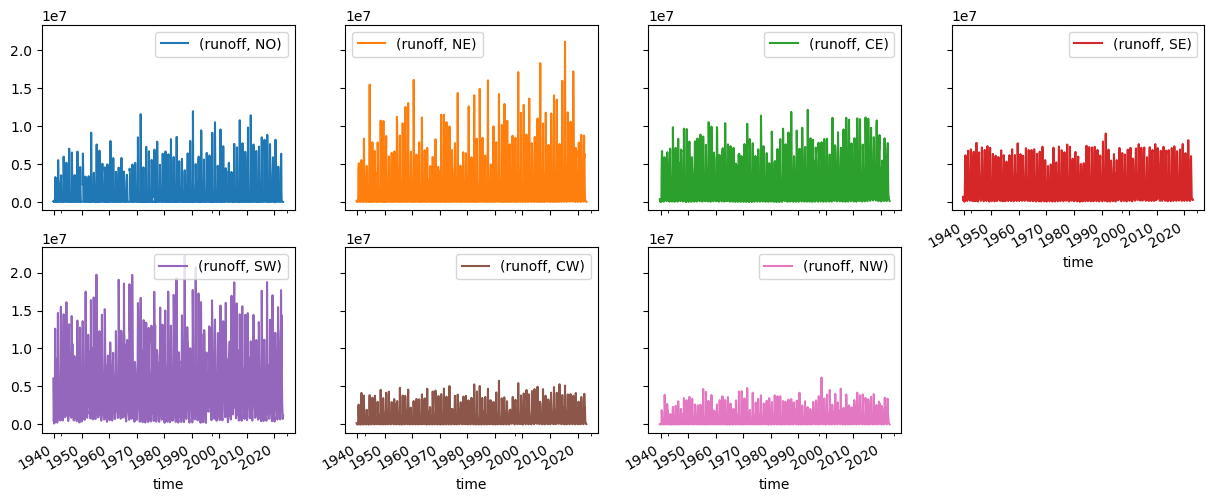

In [12]:
# drop where dsRunoff Tundra_basins is 0
dsRunoffTundra_mmyear_SECTOR = dsRunoffTundra_mmyear_SECTOR.where(dsRunoffTundra_mmyear_SECTOR > 0, np.nan)

dsRunoffTundra_mmyear_SECTOR.squeeze().to_dataframe().drop(columns='height').reset_index().set_index('time').pivot(columns='Tundra_basins').drop(columns=("runoff",0)).rename(columns=dict_Moug).plot(kind='line', subplots=True, figsize=(15, 6), layout=(2,4), sharey=True)

Convert tundra from mm to km3 

<Axes: title={'center': 'Liquid Runoff Tundra'}, xlabel='time'>

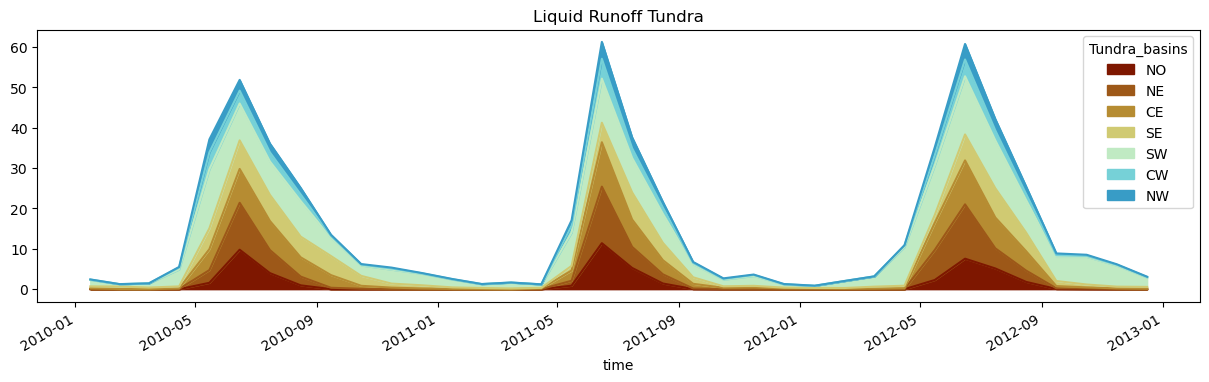

In [13]:
dfRunoffTundraSector = dsRunoffTundra_mmyear_SECTOR.to_dataframe().reset_index().drop(columns='height').set_index('time').pivot(columns='Tundra_basins').drop(columns=("runoff",0)).rename(columns=dict_Moug) *1e6/1000./1.e9
dfRunoffTundraSector.columns = dfRunoffTundraSector.columns.get_level_values(1)
dfRunoffTundraSector['2010':'2012'].plot(kind='area',stacked=True, color=colors_hex_Moug, figsize=(15, 4), title = "Liquid Runoff Tundra")


 Solid discharge

In [245]:
# solid
dfRegionDMankoff = pd.read_csv(path_Mankoff2020Solid + "region_D.csv", index_col=0)
dfErrorRegionDMankoff = pd.read_csv(path_Mankoff2020Solid + "region_err.csv", index_col=0)
dfRegionDMankoff.index = pd.to_datetime(dfRegionDMankoff.index)
dfErrorRegionDMankoff.index = pd.to_datetime(dfErrorRegionDMankoff.index)
dfRegionCovManoff = pd.read_csv(path_Mankoff2020Solid + "region_coverage.csv", index_col=0)
filterCovReg =  (dfRegionCovManoff < 0.5).values

if (time_resolution == 'Monthly'):
    dfRegionDMankoff = dfRegionDMankoff/12
    dfErrorRegionDMankoff = dfErrorRegionDMankoff/12
elif (time_resolution == 'Annual'):
    dfRegionDMankoff = dfRegionDMankoff.groupby(dfRegionDMankoff.index.year).mean()
    dfErrorRegionDMankoff = dfErrorRegionDMankoff.groupby(dfErrorRegionDMankoff.index.year).mean()
    dfRegionDMankoff.index = pd.to_datetime(dfRegionDMankoff.index, format='%Y')
    dfErrorRegionDMankoff.index = pd.to_datetime(dfErrorRegionDMankoff.index, format='%Y')

dfRegionDMankoff.columns.name = "Mouginot_basins"


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


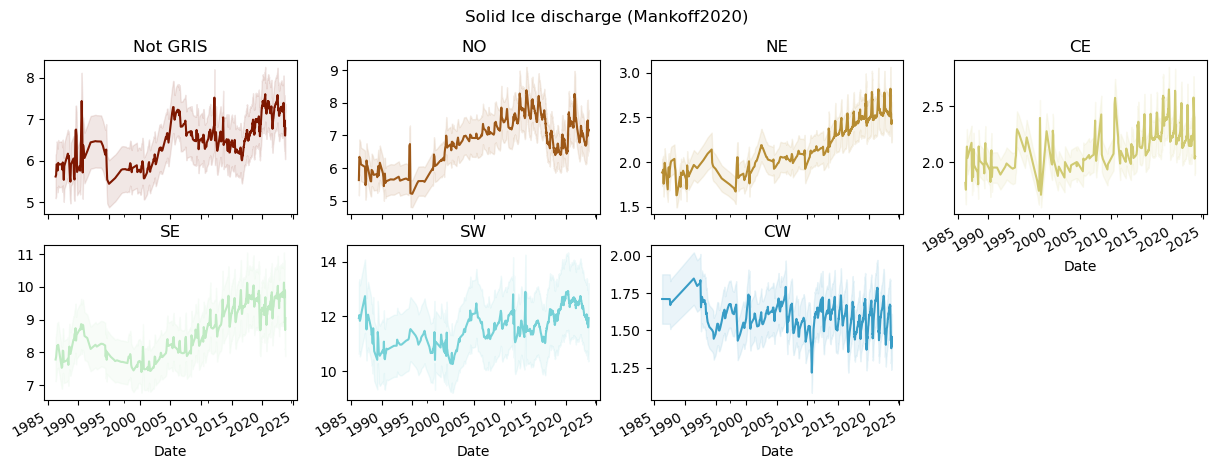

In [295]:
axs  = dfRegionDMankoff.plot(subplots=True,figsize=(15, 5), color=colors_hex_Moug, layout=(2, 4), sharex=True, legend=False, title="Solid Ice discharge (Mankoff2020)")

# also plot error as fill between
for i, ax in enumerate(axs.flatten()):
    if i == len(dict_Moug)-1:
        break
    ax.fill_between(dfRegionDMankoff.index, (dfRegionDMankoff.iloc[:,i] - dfErrorRegionDMankoff.iloc[:,i]).to_numpy(),(dfRegionDMankoff.iloc[:,i] + dfErrorRegionDMankoff.iloc[:,i]).to_numpy(), alpha=0.1, color=colors_hex_Moug[i])
    ax.set_title(dict_Moug[i])
plt.legend()

# calculate monthly mean and standard deviation per region

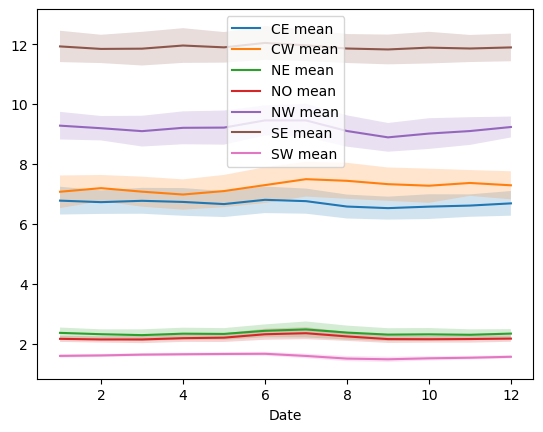

In [292]:
time_start ='2003'
time_end ='2012'

# Ensure that your DataFrame's index is a DateTimeIndex
dfRegionDMankoff.index = pd.to_datetime(dfRegionDMankoff.index)

# Calculate the monthly mean
monthly_mean = dfRegionDMankoff.groupby(dfRegionDMankoff.index.month).mean()

# Calculate the monthly standard deviation
monthly_std = dfRegionDMankoff.groupby(dfRegionDMankoff.index.month).std()

# Create a new figure
fig, ax = plt.subplots()

for column in monthly_mean.columns:
    monthly_mean[column].plot(ax=ax, label=f'{column}')
    ax.fill_between(monthly_mean.index, monthly_mean[column] - monthly_std[column], monthly_mean[column] + monthly_std[column], alpha=0.2)

# Add a legend
ax.legend()

# Show the plot
plt.show()

Precipitation

In [16]:
# if the variable is already in memory
if not 'dsPrecipFjordsSectormm' in locals():
    print("loading")
    dsPrecipFjords = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1km_precip_fjords.nc")
    dsPrecipFjords['Mouginot_basins'] = mask_tundra_sector_1k["Basins_ocean"]
    dsPrecipFjordsSectormm = dsPrecipFjords['precipcorr'].groupby(dsPrecipFjords['Mouginot_basins']).sum()

dsPrecipFjordsSector = dsPrecipFjordsSectormm*1e6/1000./1.e9
dfPrecipFjordsSector = dsPrecipFjordsSector.to_dataframe().reset_index().set_index('time').pivot(columns='Mouginot_basins').rename(columns=dict_Moug)
dfPrecipFjordsSector.columns = dfPrecipFjordsSector.columns.get_level_values(1)
# dfPrecipFjordsSector = dfPrecipFjordsSector.drop(columns=0)
dfPrecipFjordsSector

loading


Mouginot_basins,Not GRIS,NO,NE,CE,SE,SW,CW,NW
time,,,,,,,,
1990-01-16 00:00:00,0.009465,0.141765,0.439541,2.538684,1.113823,0.277772,0.057472,0.046390
1990-02-14 12:00:00,0.005674,0.087034,0.173123,1.363612,1.027397,0.237195,0.031094,0.032124
1990-03-16 00:00:00,0.007106,0.188331,0.138054,0.569057,0.406688,0.721996,0.129118,0.096179
1990-04-15 12:00:00,0.012211,0.422769,0.294695,0.726732,0.320037,1.022802,0.254107,0.243790
1990-05-16 00:00:00,0.011357,0.200942,0.064410,0.390776,0.953885,1.154487,0.374047,0.424250
...,...,...,...,...,...,...,...,...
2022-08-16 00:00:00,0.010602,0.178211,0.279215,1.070132,1.093944,1.291837,0.505349,0.294039
2022-09-15 12:00:00,0.018132,0.425279,0.428185,0.848399,0.816418,2.400202,0.741398,0.945987
2022-10-16 00:00:00,0.015159,0.232009,0.314883,2.060214,0.943373,1.166274,0.725903,0.899896


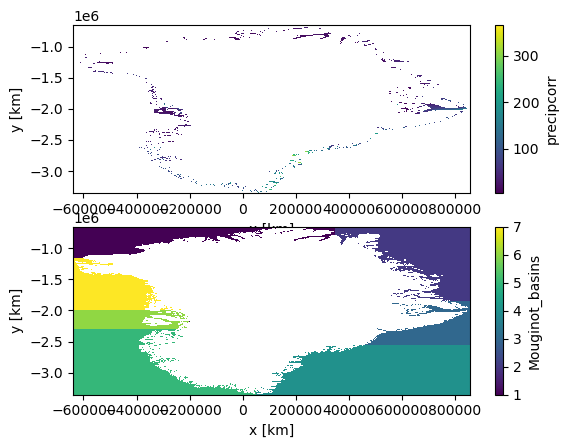

In [17]:
# fig, axs = plt.subplots(2, 1)
# dsPrecipFjords.mean('time')['precipcorr'].where(dsPrecipFjords['Mouginot_basins'] > 0).plot(ax= axs[0])
# dsPrecipFjords.mean('time')['Mouginot_basins'].where(dsPrecipFjords['Mouginot_basins'] > 0).plot(ax= axs[1])

# Per sector - combined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


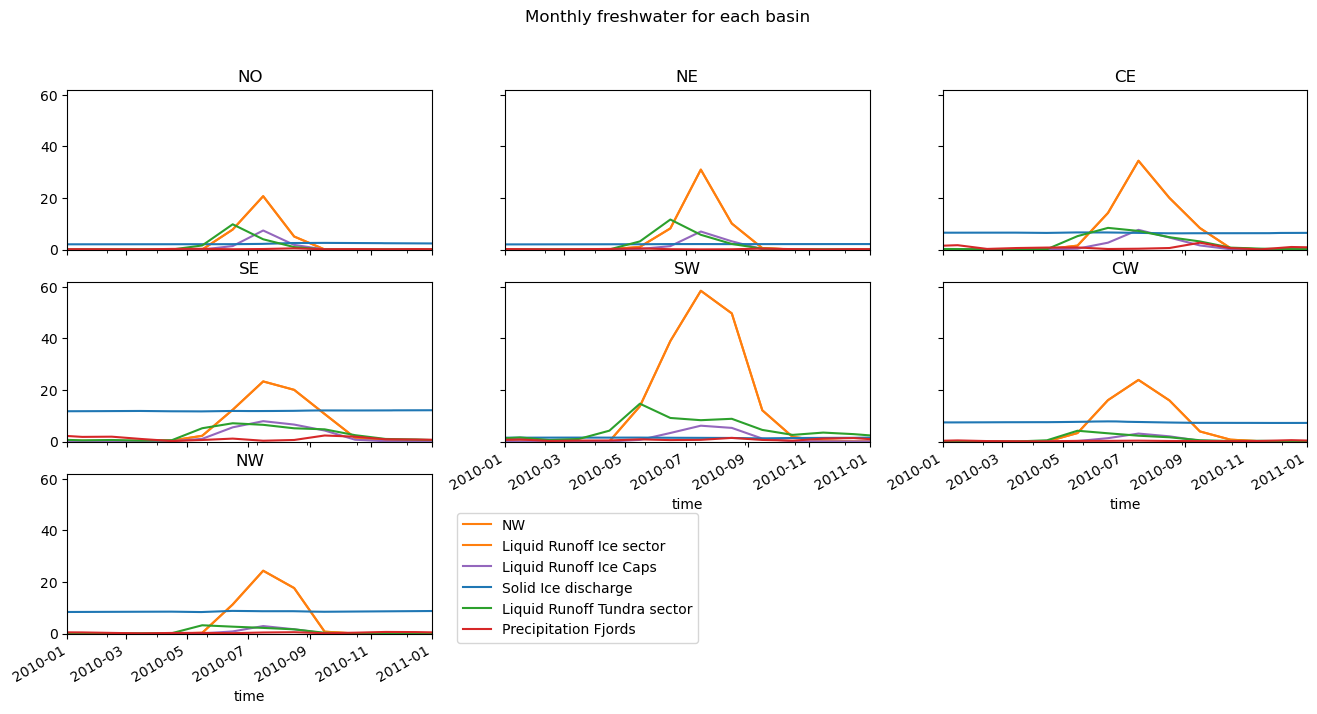

In [18]:
# fig, axs = plt.subplots(3, 3, figsize=(16, 8), sharex=True)

axs = dfRunoffIceSector.plot.line(color='tab:orange', subplots=True,layout=(3,3), figsize=(16, 8), legend=False, sharey=True, label="")

for i, basin in enumerate(dfRunoffIceSector.columns):
    basin_name = basin
    ax = axs.flatten()[i]
    
    dfRunoffIceSector[basin_name].plot.line( ax=ax, label="Liquid Runoff Ice sector", color='tab:orange')
    dfRunoffIceCapSector[basin_name].plot.line( ax=ax, label="Liquid Runoff Ice Caps", color='tab:purple')
    (dfRegionDMankoff[basin_name]).plot.line( ax=ax, label="Solid Ice discharge", color='tab:blue')
    dfRunoffTundraSector[basin_name].plot.line( ax=ax, label="Liquid Runoff Tundra sector", color='tab:green')
    dfPrecipFjordsSector[basin_name].plot.line( ax=ax, label="Precipitation Fjords", color='tab:red')

    ax.title.set_text(basin_name)

fig = axs[0, 0].figure
# title Monthly freshwater for each basin
plt.suptitle(f"{time_resolution} freshwater for each basin")

if time_resolution == 'Monthly':
    ax.set_xlim([pd.to_datetime("2010-01-01"), pd.to_datetime(years[-1]) + pd.DateOffset(years=1)])
    ax.set_ylim([0, 62])
elif time_resolution == 'Annual':
    ax.set_xlim([pd.to_datetime(years[0]), pd.to_datetime(years[-1]) + pd.DateOffset(years=1)])
plt.legend()
axs.flatten()[6].legend(bbox_to_anchor=(1.05, -0.1), loc='lower left')
plt.show()

Merge components

In [19]:
dsSectorSum = xr.merge([ 
    dfRunoffIceSector.stack().to_xarray().to_dataset(name="Liquid Runoff Ice Sheet"),
    dfRunoffIceCapSector.stack().to_xarray().to_dataset(name="Liquid Runoff Ice Caps"),
    dfRunoffTundraSector.stack().to_xarray().to_dataset(name="Liquid Runoff Tundra").rename({'Tundra_basins':'Mouginot_basins'}), 
    dfPrecipFjordsSector.stack().to_xarray().to_dataset(name="Precipitation Fjords"),
    ])
# dsSectorSumD['Solid Ice discharge original'] = dfRegionDMankoff.stack().to_xarray()
# dsSectorSum['Solid Ice discharge (interp)'] = dsSectorSum['Solid Ice discharge original'].interp(Date=dsSectorSum.time, method='linear')
# # groupby month and mean
# dsSectorSum['Solid Ice discharge (mean)'] = dsSectorSum['Solid Ice discharge original'].groupby('Date.month').mean()


def compute_weighted_monthly_mean(data):
    # Calculate the weights as the difference between each date and the previous date

    diff_next = data.Date.diff('Date').shift(Date=-1).dt.days
    diff_prev = data.Date.diff('Date').dt.days
    diff = (diff_next + diff_prev) / 2
    weights = diff
    total_weights = weights.resample(Date='1ME').sum()

    # Compute the weighted mean
    weighted_data = data * weights
    weighted_sum = weighted_data.resample(Date='1ME').sum()
    weighted_mean = weighted_sum / total_weights
    weighted_mean['Date'] = weighted_mean.Date - pd.Timedelta(15, unit='D')
    return weighted_mean

def compute_monthly_mean(data):
    return data.resample(Date='1ME').mean()

dsSectorSum['Solid Ice discharge (weighted mean)'] = compute_weighted_monthly_mean(dfRegionDMankoff.stack().to_xarray()).interp(Date=dsSectorSum.time, method='nearest').drop('Date')

#
# export dsSectorSum to csv
start = dsSectorSum.time[0].dt.strftime('%Y').values
end = dsSectorSum.time[-1].dt.strftime('%Y').values
dsSectorSum.to_netcdf(pathDataTemp + f"RACMO2.3p2_1k_sector_sum_{start}_{end}.nc")

/var/folders/cv/s_h5gzxd0h71t_d875wqxgzh0000gn/T/ipykernel_60515/1430459493.py:32: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  dsSectorSum['Solid Ice discharge (weighted mean)'] = compute_weighted_monthly_mean(dfRegionDMankoff.stack().to_xarray()).interp(Date=dsSectorSum.time, method='nearest').drop('Date')


In [20]:
# if we have loaded dsSectorSum in memory
if not 'dsSectorSum' in locals():
    dsSectorSum = xr.open_dataset(pathDataTemp + f"RACMO2.3p2_1k_sector_sum_{start}_{end}.nc")

In [21]:
# make a list of all the names of data variables in dsSectorSum
list(dsSectorSum.data_vars)
data_varsFW = ['Liquid Runoff Ice Sheet',
 'Liquid Runoff Ice Caps',
 'Liquid Runoff Tundra',
 'Precipitation Fjords',
 'Solid Ice discharge (weighted mean)']
colors_FW = ['tab:orange', 'tab:purple', 'tab:green', 'tab:red', 'tab:blue']

dict_colors_FW = dict(zip(data_varsFW, colors_FW))

In [22]:
# Calculate the mean of each DataArray in the Dataset
means = {var: dsSectorSum[var].mean().item() for var in dsSectorSum.data_vars}

# Convert the means to a DataFrame
variables_sorted = pd.DataFrame(list(means.items()), columns=['Variable', 'Mean']).sort_values(by='Mean', ascending=False)["Variable"].values

dsSectorSum = dsSectorSum[variables_sorted]

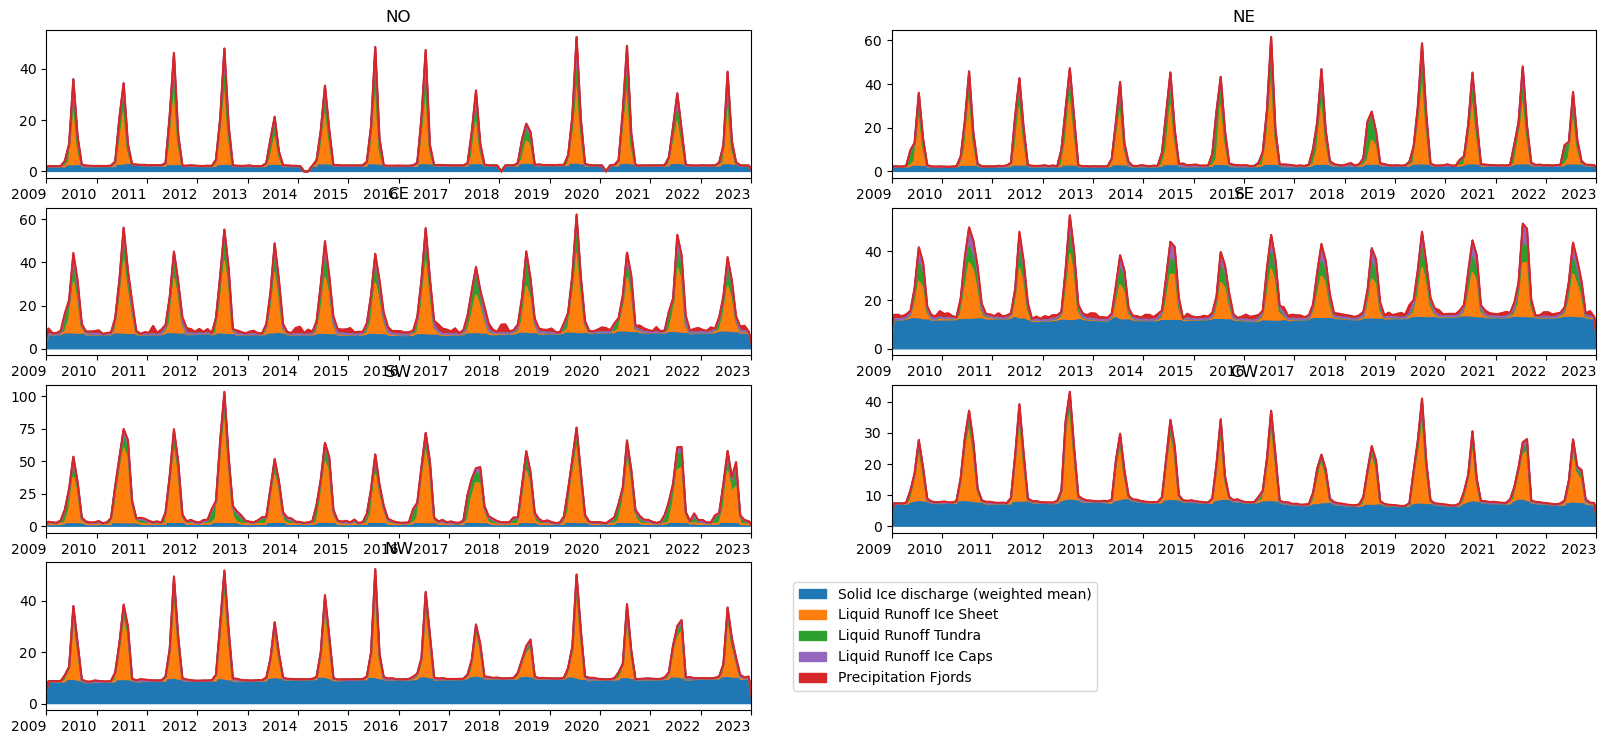

In [25]:
fig, axs = plt.subplots(4,2, figsize=(20, 10))
fig.delaxes(axs.flatten()[7])

lines, labels = [], []

# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'

for i, basin in enumerate(dfRunoffIceSector.columns):
    ax = axs.flatten()[i]
    df_single_sector = dsSectorSum.sel(Mouginot_basins=basin).to_dataframe().drop(columns='Mouginot_basins')
    # df_single_sector = (df_single_sector.T/(df_single_sector.sum(axis=1).values)).T
    index_with_nan = df_single_sector.index[df_single_sector.isna().any(axis=1)]
    df_single_sector.loc[index_with_nan, :] = np.nan

    df_single_sector.plot(kind='area', stacked=True, ax=ax,  legend=False, color=[dict_colors_FW[var] for var in df_single_sector.columns])

    ax.set_title(basin)
    ax.set_xlim([pd.to_datetime("2009"), pd.to_datetime("2022") + pd.DateOffset(years=1)])
    # keel xticks horizontal and evry year
    ax.xaxis.set_tick_params(rotation=0)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_xlabel('')
    # ax.legend()

axs.flatten()[6].legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

# fig.delaxes(axs.flatten()[7])






In [26]:
df_solid = dsSectorSum['Solid Ice discharge (weighted mean)'].sel(time=slice('2010', None)).mean(dim='time').to_dataframe().round(1).sort_values(by='Solid Ice discharge (weighted mean)', ascending=False)
df_solid.index

Index(['SE', 'NW', 'CW', 'CE', 'NE', 'NO', 'SW', 'Not GRIS'], dtype='object', name='Mouginot_basins')

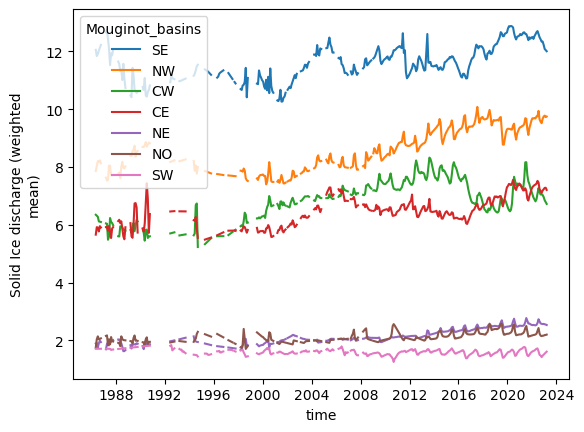

In [28]:
# plot ds solid discharge
ax = dsSectorSum['Solid Ice discharge (weighted mean)'].sel(Mouginot_basins= ['SE', 'NW', 'CW', 'CE', 'NE', 'NO', 'SW']).plot.line( hue='Mouginot_basins')


(14610.0, 19723.0)

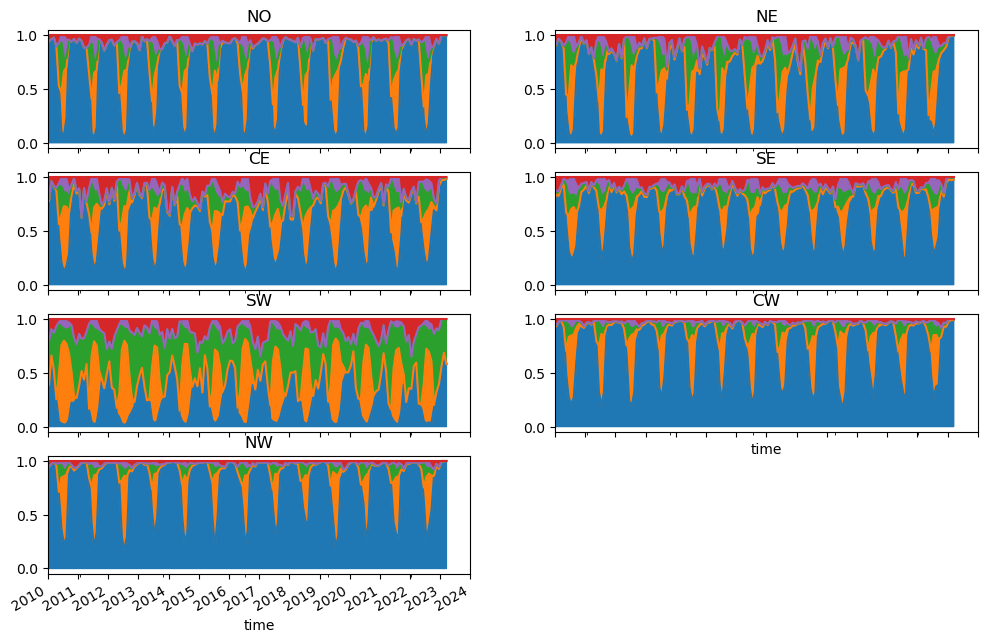

In [41]:
fig, axs = plt.subplots(4,2, sharex=True, figsize=(12, 8))
fig.delaxes(axs.flatten()[7])

lines, labels = [], []

# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'

for i, basin in enumerate(dfRunoffIceSector.columns):
    ax = axs.flatten()[i]
    df_single_sector = dsSectorSum.sel(Mouginot_basins=basin).to_dataframe().drop(columns='Mouginot_basins')
    df_single_sector = (df_single_sector.T/(df_single_sector.sum(axis=1).values)).T
    df_single_sector.plot(kind='area', stacked=True,  ax=ax,  legend=False, color=[dict_colors_FW[var] for var in df_single_sector.columns])
    ax.title.set_text(basin)
    ax.set_xticks(pd.date_range(start='2010', end='2024', freq='YS'))
    ax.set_xtickla
# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'


# now delete last subplots
# and turn on xticklabels for ax 4, and 5 
# plt.subplots_adjust(hspace=0.5)


ax.set_xlim([pd.to_datetime("2010"), pd.to_datetime("2023") + pd.DateOffset(years=1)])


In [278]:
dfGISDMankoff2003_2012

,Discharge [Gt yr-1]
Date,
1,40.001571
2,40.049920
3,40.296534
4,40.077694
5,40.089063
6,40.860014
7,40.643494
8,39.896520
9,39.678747


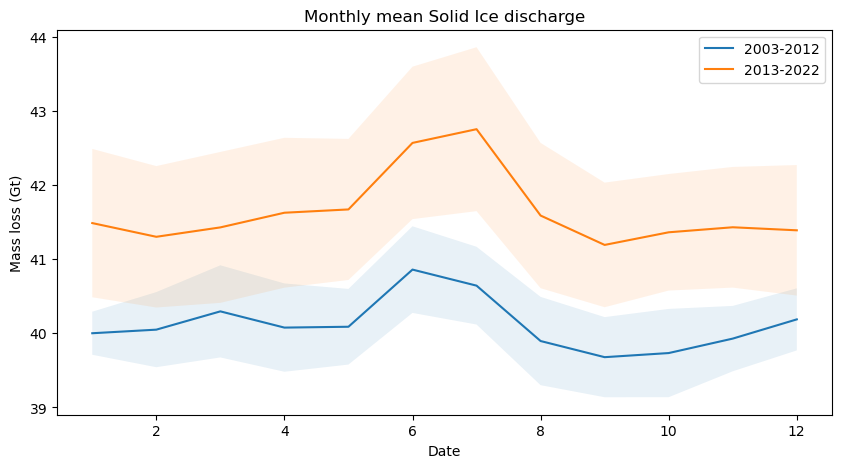

In [282]:



dfGISDMankoff2003_2012 = dfGISDMankoff['2003':'2012']
dfGISDMankoff2003_2012 = dfGISDMankoff2003_2012.groupby(dfGISDMankoff2003_2012.index.month).mean().rename(columns={"Discharge [Gt yr-1]": "mean"})
dfGISDMankoff2003_2012['std'] = dfGISDMankoff['2003':'2012'].groupby(dfGISDMankoff['2003':'2012'].index.month).std()

dfGISD_2013_2022 = dfGISDMankoff['2013':'2022']
dfGISD_2013_2022 = dfGISD_2013_2022.groupby(dfGISD_2013_2022.index.month).mean().rename(columns={"Discharge [Gt yr-1]": "mean"})
dfGISD_2013_2022['std'] = dfGISDMankoff['2013':'2022'].groupby(dfGISDMankoff['2013':'2022'].index.month).std()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

dfGISDMankoff2003_2012['mean'].plot( title='Monthly mean Solid Ice discharge', ax=ax, label = "2003-2012")
dfGISD_2013_2022['mean'].plot(ax=ax, label = "2013-2022")

ax.fill_between(dfGISDMankoff2003_2012.index, (dfGISDMankoff2003_2012['mean'] - dfGISDMankoff2003_2012['std']).to_numpy(),(dfGISDMankoff2003_2012['mean'] + dfGISDMankoff2003_2012['std']).to_numpy(), alpha=0.1)
ax.fill_between(dfGISD_2013_2022.index, (dfGISD_2013_2022['mean'] - dfGISD_2013_2022['std']).to_numpy(),(dfGISD_2013_2022['mean'] + dfGISD_2013_2022['std']).to_numpy(), alpha=0.1)
ax.legend( )
ax.set_ylabel("Mass loss (Gt)")

data_mean_2002_2012['Solid Ice discharge (weighted mean)'].values =np.squeeze(dfGISDMankoff2003_2012['mean'].values)
 

/var/folders/cv/s_h5gzxd0h71t_d875wqxgzh0000gn/T/ipykernel_60515/1459975246.py:2: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  dsMonthlyGr =  dsSectorSum.copy(deep=True).drop('winter_year').drop('summer_year')


Text(0, 0.5, 'Fraction')

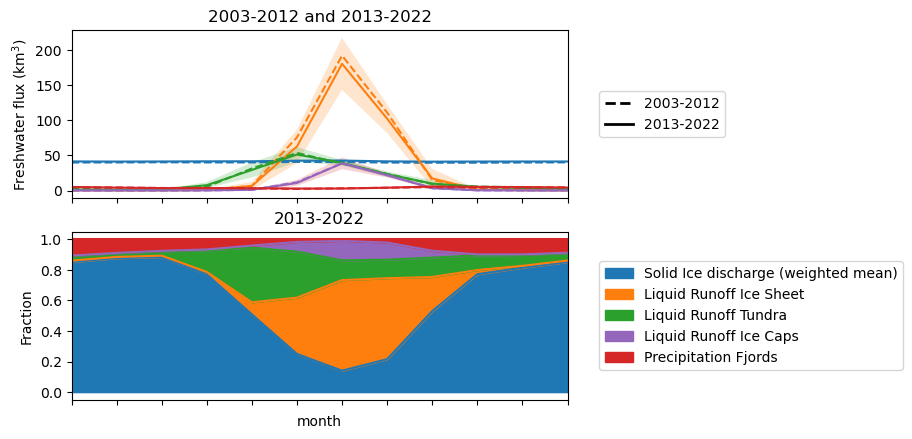

In [286]:
from matplotlib.lines import Line2D
dsMonthlyGr =  dsSectorSum.copy(deep=True).drop('winter_year').drop('summer_year')
# Calculate the mean and standard deviation for each month
data_mean = dsMonthlyGr.sel(time=slice('2013','2022')).sum(dim='Mouginot_basins').groupby('time.month').mean()
data_std = dsMonthlyGr.sel(time=slice('2013','2022')).sum(dim='Mouginot_basins').groupby('time.month').std()
# do the same for 2002-2012
data_mean_2002_2012 = dsMonthlyGr.sel(time=slice('2003','2012')).sum(dim='Mouginot_basins').groupby('time.month').mean()
data_std_2002_2012 = dsMonthlyGr.sel(time=slice('2003','2012')).sum(dim='Mouginot_basins').groupby('time.month').std()

data_mean_2002_2012['Solid Ice discharge (weighted mean)'].values =np.squeeze(dfGISDMankoff2003_2012['mean'].values)
data_mean['Solid Ice discharge (weighted mean)'].values =np.squeeze(dfGISD_2013_2022['mean'].values)
data_std['Solid Ice discharge (weighted mean)'].values =np.squeeze(dfGISD_2013_2022['std'].values)
data_std_2002_2012['Solid Ice discharge (weighted mean)'].values =np.squeeze(dfGISDMankoff2003_2012['std'].values)

# Create a new figure
fig, axs = plt.subplots(2,1, sharex=True)

ax = axs[0]
# Loop over the data variables and plot each one with its standard deviation
for var in data_mean.data_vars:
    # Plot the mean
    data_mean[var].plot(ax=ax, label=var, color=dict_colors_FW[var])
    ax.fill_between(data_mean['month'], data_mean[var] - data_std[var], data_mean[var] + data_std[var], alpha=0.2)
    data_mean_2002_2012[var].plot(ax=ax, label=var, linestyle='--', color=dict_colors_FW[var])

handles = [Line2D([0], [0], color='black', linewidth=2, linestyle='--'),  # Dashed line for 2003-2012
           Line2D([0], [0], color='black', linewidth=2)]  # Solid line for 2013-2022
ax.legend(handles, ['2003-2012', '2013-2022'], bbox_to_anchor=(1.05, 0.5), loc='center left')
ax.set_ylabel(r'Freshwater flux (km$^3$)')
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_title('2003-2012 and 2013-2022')


# do the second in percentage and stacked area
ax = axs[1]
data_mean_perc = data_mean.to_dataframe()
data_mean_perc = (data_mean_perc.T/(data_mean_perc.sum(axis=1).values)).T
data_mean_perc.plot(kind='area', stacked=True, ax=ax, color=[dict_colors_FW[var] for var in data_mean_perc.columns])
ax.title.set_text('2013-2022')
ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
ax.set_xticks(np.arange(1, 13))
ax.set_xlim([1, 12])
ax.set_ylabel('Fraction')


## Seasonal cycle mean

In [177]:
dsSectorSeasonalCycle = dsSectorSum.copy(deep=True).drop('winter_year').drop('summer_year')
# linearly interpolate the Solid Ice discharge (weighted mean) to the same time as the other variables
dsSectorSeasonalCycle['Solid Ice discharge (weighted mean)'] = dsSectorSeasonalCycle['Solid Ice discharge (weighted mean)'].interp(time=dsSectorSeasonalCycle.time)

start_year ='2012'
end_year = '2022'  # the last year of the data (so including this year)

# Calculate the seasonal cycle of each DataArray in the Dataset

dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').mean()

/var/folders/cv/s_h5gzxd0h71t_d875wqxgzh0000gn/T/ipykernel_60515/2730080018.py:1: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  dsSectorSeasonalCycle = dsSectorSum.copy(deep=True).drop('winter_year').drop('summer_year')


<xarray.Dataset>
Dimensions:                              (month: 12, Mouginot_basins: 8)
Coordinates:
  * Mouginot_basins                      (Mouginot_basins) object 'CE' ... 'SW'
  * month                                (month) int64 1 2 3 4 5 ... 9 10 11 12
Data variables:
    Solid Ice discharge (weighted mean)  (month, Mouginot_basins) float64 6.7...
    Liquid Runoff Ice Sheet              (month, Mouginot_basins) float32 0.1...
    Liquid Runoff Tundra                 (month, Mouginot_basins) float32 0.1...
    Liquid Runoff Ice Caps               (month, Mouginot_basins) float32 0.0...
    Precipitation Fjords                 (month, Mouginot_basins) float32 2.0...

/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of f

Text(0.5, 0.98, 'Seasonal cycle of freshwater for each basin 2012-2022')

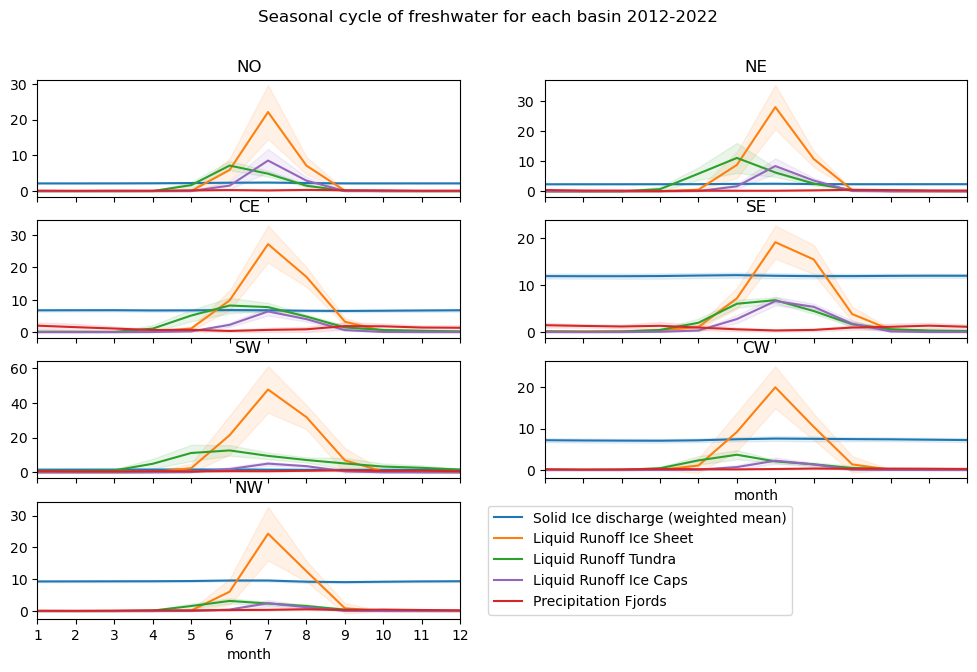

In [191]:
fig, axs = plt.subplots(4,2, sharex=True, figsize=(12, 7))
fig.delaxes(axs.flatten()[7])

lines, labels = [], []

# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'

for i, basin in enumerate(dfRunoffIceSector.columns):
    ax = axs.flatten()[i]
    df_single_sector = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').mean().sel(Mouginot_basins=basin).to_dataframe().drop(columns='Mouginot_basins')
    # add standard deviation as shading
    df_single_sector_std = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').std().sel(Mouginot_basins=basin).to_dataframe().drop(columns='Mouginot_basins')

    df_single_sector.plot(kind='line',  ax=ax,  legend=False, color=[dict_colors_FW[var] for var in df_single_sector.columns])
    for var in df_single_sector.columns:
        ax.fill_between(df_single_sector.index, df_single_sector[var] - df_single_sector_std[var], df_single_sector[var] + df_single_sector_std[var], alpha=0.1, color=dict_colors_FW[var])
    ax.title.set_text(basin)
    ax.set_xlim([1, 12])
    ax.set_xticks(np.arange(1, 13))
ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
fig.suptitle(f"Seasonal cycle of freshwater for each basin {start_year}-{end_year}")

## Seasonal sum

In [42]:
data_varsFW = list(dsSectorSum.data_vars)[:5]
data_varsFW

['Solid Ice discharge (weighted mean)',
 'Liquid Runoff Ice Sheet',
 'Liquid Runoff Tundra',
 'Liquid Runoff Ice Caps',
 'Precipitation Fjords']

In [43]:
basinorderkarlsson = ["SW", "SE", "NW", "NO", "NE", "CW", "CE"][::-1]

In [44]:
dsSectorSum['winter_year'] = dsSectorSum.time.dt.year.where((dsSectorSum.time.dt.month <= 3) | (dsSectorSum.time.dt.month >= 10), np.nan)
dsSectorSum['winter_year'] = dsSectorSum['winter_year'].where(dsSectorSum.time.dt.month <= 3, dsSectorSum['winter_year'] + 1)
ds_winter_sum = dsSectorSum.groupby('winter_year').mean(skipna=True)
# multiply data_varsFW by 6
ds_winter_sum[data_varsFW] = ds_winter_sum[data_varsFW] * 6
df_winter_sum = ds_winter_sum.to_dataframe()
df_winter_sum["Winter Liquid"] = df_winter_sum["Liquid Runoff Ice Sheet"] + df_winter_sum["Liquid Runoff Ice Caps"] + df_winter_sum["Liquid Runoff Tundra"] + df_winter_sum["Precipitation Fjords"]
df_winter_sum["Winter Solid"] = df_winter_sum["Solid Ice discharge (weighted mean)"]

# Create a new coordinate 'year' for the summer year of each time point
dsSectorSum['summer_year'] = dsSectorSum.time.dt.year.where((dsSectorSum.time.dt.month >= 4) & (dsSectorSum.time.dt.month <= 9), np.nan)
ds_summer_sum = dsSectorSum.groupby('summer_year').mean(skipna=True)
ds_summer_sum[data_varsFW] = ds_summer_sum[data_varsFW] * 6.

ds_summer_sum["Summer Liquid"] = ds_summer_sum["Liquid Runoff Ice Sheet"] + ds_summer_sum["Liquid Runoff Ice Caps"] + ds_summer_sum["Liquid Runoff Tundra"] + ds_summer_sum["Precipitation Fjords"]
ds_summer_sum["Summer Solid"] = ds_summer_sum["Solid Ice discharge (weighted mean)"]
df_summer_sum =ds_summer_sum.to_dataframe()

dfSectorSeasonalSum = pd.concat([df_summer_sum["Summer Liquid"], df_summer_sum["Summer Solid"], df_winter_sum["Winter Liquid"], df_winter_sum["Winter Solid"]], axis=1)
dfSectorSeasonalSum.index.set_names(['Year', 'Basin'], inplace=True)


In [45]:

dfSectorSeasonalSumdiff = ((dfSectorSeasonalSum['2012':'2022'].groupby('Basin').mean() - dfSectorSeasonalSum['2002':'2012'].groupby('Basin').mean())/dfSectorSeasonalSum['2002':'2012'].groupby('Basin').mean()*100).round(1).dropna()
# .to_csv(pathDataTemp+"/Sum_freshwater_per_sector/SeasonalChange.csv")

Text(0.5, 0.98, 'Seasonal mean change in freshwater per sector\n(2012-2022) - (2002-2012)')

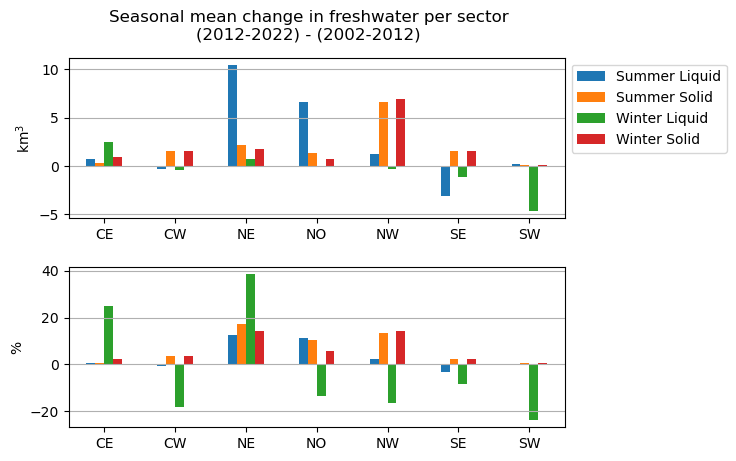

In [46]:
fig, (axKM, axPercent) = plt.subplots(2,1)

((dfSectorSeasonalSum['2012':'2022'].groupby('Basin').mean() - dfSectorSeasonalSum['2002':'2012'].groupby('Basin').mean())/dfSectorSeasonalSum['2002':'2012'].groupby('Basin').mean()*100).round(1).dropna().loc[basinorderkarlsson].plot(kind='bar', ax=axPercent,  legend=False, ylabel="%")
# horizontal grid

# drop not gris
(dfSectorSeasonalSum['2012':'2022'].groupby('Basin').mean() - dfSectorSeasonalSum['2002':'2012'].groupby('Basin').mean()).loc[basinorderkarlsson].plot(kind='bar', ax=axKM, ylabel=r"km$^3$",    legend=False)

axKM.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.subplots_adjust(hspace=0.3)
for ax in [axKM, axPercent]:
    ax.grid(axis='y')
    ax.set_xlabel('')
    # HORIZONTAL XTICKLABLES
    ax.xaxis.set_tick_params(rotation=0)

 
fig.suptitle("Seasonal mean change in freshwater per sector\n(2012-2022) - (2002-2012)")

exporting to excel

In [47]:
dfSectorSeasonalFWcomp = pd.concat([df_summer_sum[data_varsFW], df_winter_sum[data_varsFW]], axis=1, keys = ['Summer', 'Winter'])

# combine column names
dfSectorSeasonalFWcomp.columns = dfSectorSeasonalFWcomp.columns.map(' '.join)
(dfSectorSeasonalFWcomp.loc['2012':'2022'].groupby('Mouginot_basins').mean() - dfSectorSeasonalFWcomp.loc['2002':'2012'].groupby('Mouginot_basins').mean()).dropna().round(1).to_csv(pathDataTemp+"/Sum_freshwater_per_sector/SeasonalChange_FWvars.csv")

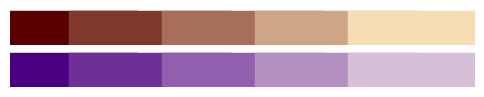

In [117]:
def make_brown_and_purple_color_array(num_colors):
    start_color = np.array([90, 0, 0])  # Maroon (RGB: 128, 0, 0)
    end_color = np.array([245, 222, 179])  # Wheat (RGB: 245, 222, 179)
    colors_brown = np.linspace(start_color, end_color, num=num_colors, dtype=int)

    start_color = np.array([75, 0, 130])  # Indigo (RGB: 75, 0, 130)
    end_color = np.array([216, 191, 216])  # Thistle (RGB: 216, 191, 216)
    colors_indigo_thistle = np.linspace(start_color, end_color, num=num_colors, dtype=int)

    # Convert RGB arrays to hex color codes
    colors_indigo_thistle_hex = ['#%02x%02x%02x' % tuple(color) for color in colors_indigo_thistle]
    colors_brown_hex = ['#%02x%02x%02x' % tuple(color) for color in colors_brown]
    return colors_brown_hex, colors_indigo_thistle_hex

colors_brown_hex, colors_indigo_thistle_hex=make_brown_and_purple_color_array(5)

fig, (ax,axP)= plt.subplots(2,1, figsize=(6, 1))
for i, color in enumerate(colors_brown_hex):
    ax.axhline(0, i / 5, (i + 1) / 5, color=color, linewidth=50)
ax.axis('off')
for i, color in enumerate(colors_indigo_thistle_hex):
    axP.axhline(0, i / 5, (i + 1) / 5, color=color , linewidth=50)
axP.axis('off')
plt.show()


In [137]:
def write_values_in_barh(ax):
    prev_width = 0
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        
        if width <1.5:
            continue

        # Get the color of the bar
        r, g, b, a = p.get_facecolor()

        # Calculate the luminance of the color
        luminance = 0.299*r + 0.587*g + 0.114*b

        # Choose the text color based on the luminance
        text_color = 'white' if luminance < 0.5 else 'black'
        ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color=text_color)
        prev_width = width

In [102]:
dfSectorSeasonalFWcomp['2013':'2023']

Summer Solid Ice discharge (weighted mean)  \
       Mouginot_basins                                               
2013.0 CE                                                39.501427   
       CW                                                47.436092   
       NE                                                13.370870   
       NO                                                12.525779   
       NW                                                54.843321   
...                                                            ...   
2022.0 NO                                                13.580811   
       NW                                                58.331159   
       Not GRIS                                                NaN   
       SE                                                75.457195   
       SW                                                 9.708986   

                        Summer Liquid Runoff Ice Sheet  \
       Mouginot_basins                                   
2013.0 CE                                    55.816353   
       CW                                    33.014664   
       NE                                    43.648590   
       NO                                    17.559946   
       NW                                    30.484013   
...                                                ...   
2022.0 NO                                    29.431229   
       NW                                    42.192081   
       Not GRIS                                    NaN   
       SE                                    47.135452   
       SW                                   105.889587   

                        Summer Liquid Runoff Tundra  \
       Mouginot_basins                                
2013.0 CE                                 21.323618   
       CW                                  9.565691   
       NE                                 17.457626   
       NO                                 12.033665   
       NW                                  8.209946   
...                                             ...   
2022.0 NO                                 14.940792   
       NW                                  9.639290   
       Not GRIS                                 NaN   
       SE                                 21.121984   
       SW                                 63.638184   

                        Summer Liquid Runoff Ice Caps  \
       Mouginot_basins                                  
2013.0 CE                                   14.149534   
       CW                                    4.036480   
       NE                                   12.555897   
       NO                                    5.895494   
       NW                                    2.356913   
...                                               ...   
2022.0 NO                                   10.932095   
       NW                                    4.081030   
       Not GRIS                                   NaN   
       SE                                   19.137369   
       SW                                   10.724281   

                        Summer Precipitation Fjords  \
       Mouginot_basins                                
2013.0 CE                                  6.371898   
       CW                                  1.314984   
       NE                                  2.280140   
       NO                                  1.532879   
       NW                                  2.072316   
...                                             ...   
2022.0 NO                                  1.736431   
       NW                                  2.162636   
       Not GRIS                            0.064190   
       SE                                  4.217947   
       SW                                  6.556641   

                        Winter Solid Ice discharge (weighted mean)  \
       Mouginot_basins                                               
2013.0 CE                                   

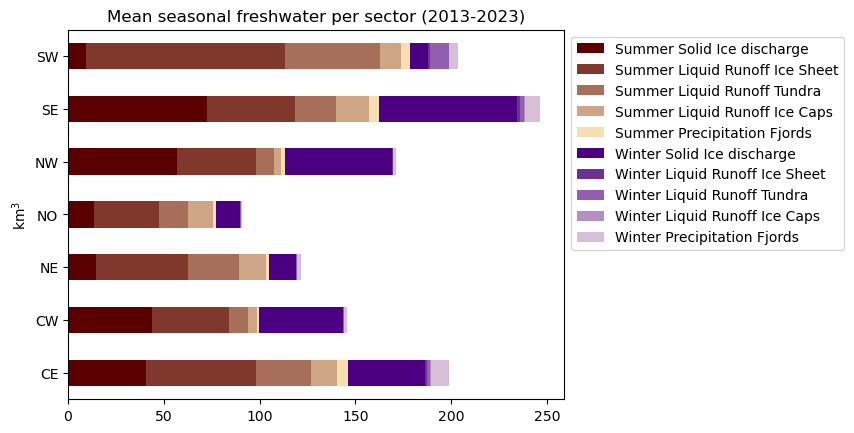

In [108]:
rename_solid = {'Solid Ice discharge (weighted mean)': 'Solid Ice discharge', 'Winter Solid Ice discharge (weighted mean)': 'Winter Solid Ice discharge', 'Summer Solid Ice discharge (weighted mean)': 'Summer Solid Ice discharge'}

# Combine the two lists of hex color codes
colors_hex =  colors_brown_hex +colors_indigo_thistle_hex

fig,ax = plt.subplots(1, 1,)
dfSectorSeasonalFWcomp['2013':'2023'].groupby('Mouginot_basins').mean().rename(columns=rename_solid).loc[basinorderkarlsson].plot(kind='barh', stacked=True, ylabel="km$^3$", legend=True, ax=ax, color=colors_hex)
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.title.set_text("Mean seasonal freshwater per sector (2013-2023)")


['Winter Solid Ice discharge',
 'Winter Precipitation Fjords',
 'Winter Liquid Runoff Tundra + Ice Caps',
 'Winter Liquid Runoff Ice Sheet',
 'Summer Solid Ice discharge',
 'Summer Precipitation Fjords',
 'Summer Liquid Runoff Tundra + Ice Caps',
 'Summer Liquid Runoff Ice Sheet']

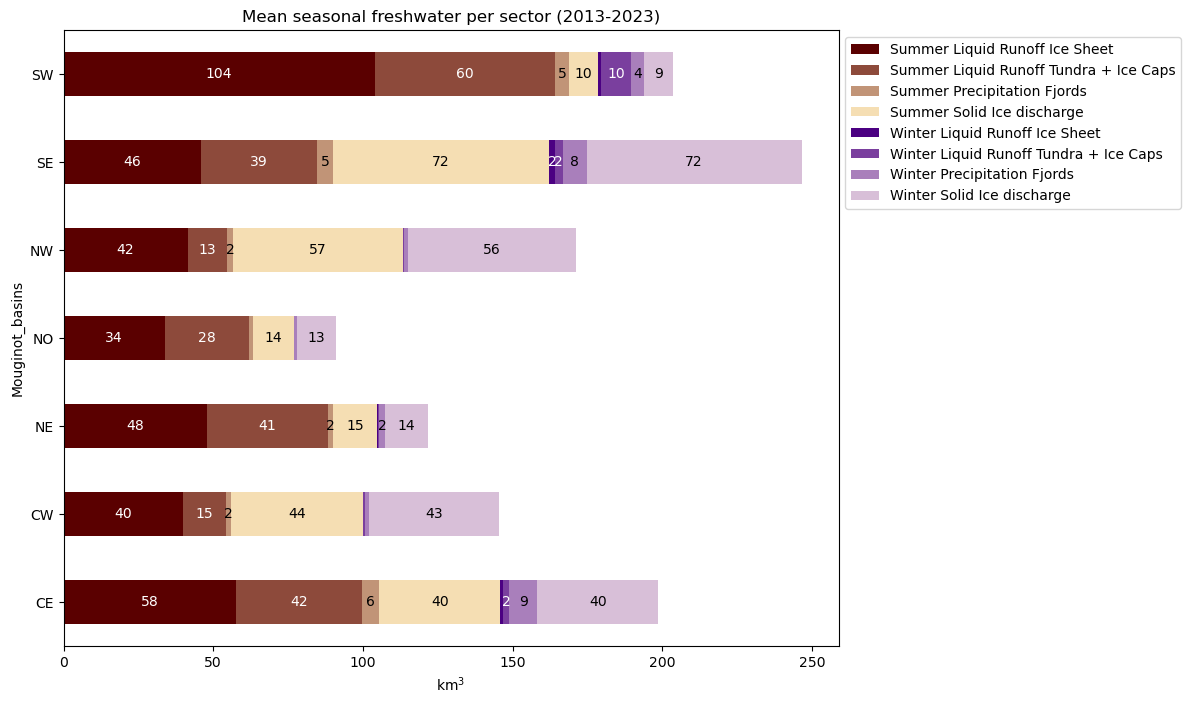

In [156]:
rename_solid = {'Solid Ice discharge (weighted mean)': 'Solid Ice discharge', 'Winter Solid Ice discharge (weighted mean)': 'Winter Solid Ice discharge', 'Summer Solid Ice discharge (weighted mean)': 'Summer Solid Ice discharge'}

# Combine the two lists of hex color codes
colors_brown_hex4, colors_indigo_thistle_hex4=make_brown_and_purple_color_array(4)
colors_hex4 =  colors_brown_hex4 +colors_indigo_thistle_hex4

# fig,ax = plt.subplots(1, 1,figsize=(5, 8)) 
fig,ax = plt.subplots(1, 1,figsize=(10,8))
# make a local variable
dfSectorSeasonalFWcomp_4_only =dfSectorSeasonalFWcomp['2013':'2023'].groupby('Mouginot_basins').mean().rename(columns=rename_solid).loc[basinorderkarlsson]
dfSectorSeasonalFWcomp_4_only['Winter Liquid Runoff Tundra + Ice Caps'] = dfSectorSeasonalFWcomp_4_only['Winter Liquid Runoff Tundra'] + dfSectorSeasonalFWcomp_4_only['Winter Liquid Runoff Ice Caps']
dfSectorSeasonalFWcomp_4_only['Summer Liquid Runoff Tundra + Ice Caps'] = dfSectorSeasonalFWcomp_4_only['Summer Liquid Runoff Tundra'] + dfSectorSeasonalFWcomp_4_only['Summer Liquid Runoff Ice Caps']
dfSectorSeasonalFWcomp_4_only=dfSectorSeasonalFWcomp_4_only.loc[:,['Winter Solid Ice discharge', 'Winter Precipitation Fjords', 'Winter Liquid Runoff Tundra + Ice Caps', 'Winter Liquid Runoff Ice Sheet', 'Summer Solid Ice discharge', 'Summer Precipitation Fjords', 'Summer Liquid Runoff Tundra + Ice Caps', 'Summer Liquid Runoff Ice Sheet'][::-1]]
# dfSectorSeasonalFWcomp_4_only = dfSectorSeasonalFWcomp_4_only.div(dfSectorSeasonalFWcomp_4_only.sum(axis=1), axis=0)

dfSectorSeasonalFWcomp_4_only.plot(kind='barh', stacked=True, xlabel="km$^3$", legend=True, ax=ax, color=colors_hex4)
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.title.set_text("Mean seasonal freshwater per sector (2013-2023)")
write_values_in_barh(ax)

Text(0.5, 0, 'km$^3$ w.e. per year')

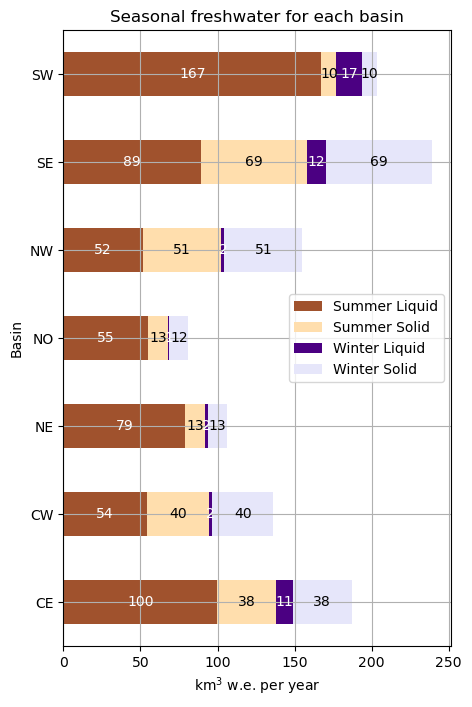

In [107]:
colors_seasons = ['sienna', 'navajowhite', 'indigo', 'lavender']

# Create the bar plot and get the returned Axes object
ax = dfSectorSeasonalSum.groupby('Basin').mean().div(
    1
    # dfSectorSeasonalSum.groupby('Basin').mean().sum(axis=1), axis=0
    ).loc[basinorderkarlsson].plot(kind='barh', stacked=True, figsize=(5, 8), color=colors_seasons, title="Seasonal freshwater for each basin")
write_values_in_barh(ax)

plt.grid()

# km 3 w.e.
plt.xlabel("km$^3$ w.e. per year")

<Axes: title={'center': 'Summer freshwater 2010-2020'}, ylabel='Mouginot_basins'>

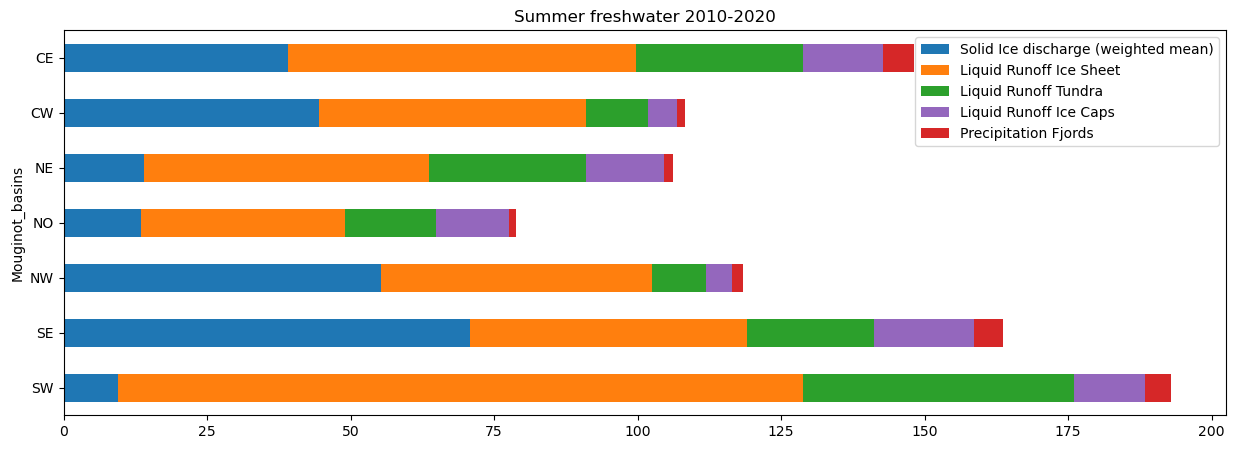

In [80]:
df_summer_sum['2010':'2020'][data_varsFW].groupby('Mouginot_basins').mean().loc[basinorderkarlsson[::-1],data_varsFW].plot(kind='barh', stacked=True, figsize=(15, 5), title="Summer freshwater 2010-2020", color=dict_colors_FW)

Interpolating solid ice discharge

In [385]:
# 

import plotly.graph_objects as go

# Create a new figure
fig = go.Figure()



# Add a line for 'dfRegionDMankoff'
fig.add_trace(go.Scatter(
    x=dfRegionDMankoff.index.values,
    y=dfRegionDMankoff['CE'].values,
    mode='markers',
    name='dfRegionDMankoff'
))

# Add a line for 'Solid Ice discharge (mean)'
fig.add_trace(go.Scatter(
    x=dsSectorSum.time.values,
    y=dsSectorSum['Solid Ice discharge (weighted mean)'].values,
    mode='lines',
    name='Solid Ice discharge (Weighted mean)'
))

# Add a line for 'Solid Ice discharge (mean)'
fig.add_trace(go.Scatter(
    x=dsSectorSum.time.values,
    y=dsSectorSum['Solid Ice discharge (weighted mean)'].values,
    mode='markers',
    name='Solid Ice discharge (Weighted mean)'
))

# update range to first displayed value for dfRegionDMankoff
fig.update_xaxes(range=['1986', '2024'])

# Show the figure
fig.show()